In [1]:
from numpy import *
import numpy as np
import random
from matplotlib import pyplot as plt
import math
import pandas as pd
import cv2

## Parameters values

In [2]:
C = 0.000001 # Capacitance 1.0 micro farad 
ur = -0.00065  # Resting potential -65 mV 
T = 0.7 #  Encoding period 700 ms 
tau = 0.01  #Time constant 10 ms 
uth = -0.00055 #Reference spiking threshold -55 mV 
dt = 0.001
yl = ym = 1
bs = bl = bm  =  1
V = 0
da= 0 #dark adaptation ,
cr = 1 #Colour response rebalancing

In [3]:
time  = arange(0, T+dt, dt)

In [4]:
time[:10]

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009])

## dataSet import

In [5]:
dataset = pd.read_csv('C:/Users/Rasoul/Desktop/sRGB.csv')
x= dataset.iloc[:,-6:-3].values
def sum(x):
    return x[0] + x[1]
y = np.apply_along_axis(sum, axis=1, arr=x) #equ 2

## Encoding

### The maximum possible stimulus

In [6]:
maxB =(np.amax((x[:,2]))) # equ 18 constant\n",
maxG =(np.amax((x[:,1])))
maxR =(np.amax((x[:,0])))

### Colour visual perception

In [7]:
Pb = [[0 for x in range(len(x[0]))] for y in range(len(x))]  # equ 1
for i in range(len(x)):
    for j,p in enumerate(x[i]):
           Pb[i][j] = cr*math.log(p,e) + da

## Encoding euq 18

In [8]:
Gl = [[0 for x in range(len(time))] for y in range(len(x))] 
Gm = [[0 for x in range(len(time))] for y in range(len(x))] 
Gs = [[0 for x in range(len(time))] for y in range(len(x))]
cgl = 0
for i in range(len(Pb)):
        for j in range(len(Pb[0])):
            for k in range(len(time)): 
                if Pb[i][j] >= time[k]: 
                    Gl[i][j] = 1   
                if Pb[i][j] >= time[k]: 
                    Gm[i][j] = 1  
                if Pb[i][j] >= time[k]: 
                    Gs[i][j] = 1 


### End of encoding process

### Membrane potential

### prepration

### Gl calculation

In [9]:
k = 0
for i in range(len(Gl)):
    for j in range(len(Gl[0])):
        Gl[i][j]=  (Gl[i][j])*C*(exp(-dt/tau))
        if(Gl[i][j]) >0:
            k = k+1

In [10]:
print(k)

150


In [11]:
# dt or  t\n",
#     "# for i in range(len(Pb)):\n",
#     "#     for j,t in enumerate(time):\n",
#     "#         Gl[i][j]=  (Gl[i][j])*C*(exp(-t/tau))

### Gm calculation

In [12]:
kk = 0
for i in range(len(Gm)):
    for j in range(len(Gm[0])):
        Gm[i][j]=  (Gm[i][j])*C*(exp(-dt/tau))
        if(Gm[i][j]) >0:
            kk = kk+1

In [13]:
print(kk)

150


### Gs calculation

In [14]:
p = 0
for i in range(len(Gm)):
    for j in range(len(Gm[0])):
        Gm[i][j]=  (Gm[i][j])*C*(exp(-dt/tau))
        if(Gm[i][j]) >0:
            p = p+1

In [15]:
print(p)

150


## Equation 2

In [16]:
Grg = [[0 for x in range(len(time))] for y in range(len(x))]
for i in range(len(x)):
    for j in range(len(time)):
        Grg[i][j]= yl*Gl[i][j] - ym*Gm[i][j]

## Equation 3

In [17]:
Gby = [[0 for x in range(len(time))] for y in range(len(x))]
for i in range(len(x)):
    for j in range(len(time)):
        Gby[i][j]= bs*Gs[i][j] - (bl*Gl[i][j] + bm*Gm[i][j])

### Membrane potential at time

In [28]:
Un = [[0 for x in range(len(time))] for y in range(len(x))]    # membrane potential of neurons  
S =  [[0 for x in range(len(time))] for y in range(len(x))] 
t0 = time[0] 
for i in range(len(Un)): 
    for j in range(len(Un[0])): 
            if j==0: 
                Un[i][j] = ur 
                cV = 0
                t0 = time[0]
            else: 
                cV = cV + Gl[i][j]
                temptime = time[j] - t0
                temR = ur*(exp(-(temptime/tau)))
                Un[i][j]= temR + cV 
#                 print(i, j,'U', Un[i][j],'G', Gl[i][j], 'v', V, 'time', time[j], 'cV', cV, 'temR', temR)
                if Un[i][j]+V >= uth:
                    S[i][j]= 1 
                    V = 0 
                    Un[i][j] = ur  
                    t0 = time[j]

In [29]:
kk = 0
for i in range(len(S)):
    for j in range(len(S[0])):
        if S[i][j]==1:
            print(i,j)
            kk = kk+1

0 2
0 4
0 6
0 8
0 10
0 12
0 14
0 16
0 18
0 20
0 22
0 24
0 26
0 28
0 30
0 32
0 34
0 36
0 38
0 40
0 42
0 44
0 46
0 48
0 50
0 52
0 54
0 56
0 58
0 60
0 62
0 64
0 66
0 68
0 70
0 72
0 74
0 76
0 78
0 80
0 82
0 84
0 86
0 88
0 90
0 92
0 94
0 96
0 98
0 100
0 102
0 104
0 106
0 108
0 110
0 112
0 114
0 116
0 118
0 120
0 122
0 124
0 126
0 128
0 130
0 132
0 134
0 136
0 138
0 140
0 142
0 144
0 146
0 148
0 150
0 152
0 154
0 156
0 158
0 160
0 162
0 164
0 166
0 168
0 170
0 172
0 174
0 176
0 178
0 180
0 182
0 184
0 186
0 188
0 190
0 192
0 194
0 196
0 198
0 200
0 202
0 204
0 206
0 208
0 210
0 212
0 214
0 216
0 218
0 220
0 222
0 224
0 226
0 228
0 230
0 232
0 234
0 236
0 238
0 240
0 242
0 244
0 246
0 248
0 250
0 252
0 254
0 256
0 258
0 260
0 262
0 264
0 266
0 268
0 270
0 272
0 274
0 276
0 278
0 280
0 282
0 284
0 286
0 288
0 290
0 292
0 294
0 296
0 298
0 300
0 302
0 304
0 306
0 308
0 310
0 312
0 314
0 316
0 318
0 320
0 322
0 324
0 326
0 328
0 330
0 332
0 334
0 336
0 338
0 340
0 342
0 344
0 346
0 348
0 350
0 3

5 100
5 102
5 104
5 106
5 108
5 110
5 112
5 114
5 116
5 118
5 120
5 122
5 124
5 126
5 128
5 130
5 132
5 134
5 136
5 138
5 140
5 142
5 144
5 146
5 148
5 150
5 152
5 154
5 156
5 158
5 160
5 162
5 164
5 166
5 168
5 170
5 172
5 174
5 176
5 178
5 180
5 182
5 184
5 186
5 188
5 190
5 192
5 194
5 196
5 198
5 200
5 202
5 204
5 206
5 208
5 210
5 212
5 214
5 216
5 218
5 220
5 222
5 224
5 226
5 228
5 230
5 232
5 234
5 236
5 238
5 240
5 242
5 244
5 246
5 248
5 250
5 252
5 254
5 256
5 258
5 260
5 262
5 264
5 266
5 268
5 270
5 272
5 274
5 276
5 278
5 280
5 282
5 284
5 286
5 288
5 290
5 292
5 294
5 296
5 298
5 300
5 302
5 304
5 306
5 308
5 310
5 312
5 314
5 316
5 318
5 320
5 322
5 324
5 326
5 328
5 330
5 332
5 334
5 336
5 338
5 340
5 342
5 344
5 346
5 348
5 350
5 352
5 354
5 356
5 358
5 360
5 362
5 364
5 366
5 368
5 370
5 372
5 374
5 376
5 378
5 380
5 382
5 384
5 386
5 388
5 390
5 392
5 394
5 396
5 398
5 400
5 402
5 404
5 406
5 408
5 410
5 412
5 414
5 416
5 418
5 420
5 422
5 424
5 426
5 428
5 430
5 43

10 598
10 600
10 602
10 604
10 606
10 608
10 610
10 612
10 614
10 616
10 618
10 620
10 622
10 624
10 626
10 628
10 630
10 632
10 634
10 636
10 638
10 640
10 642
10 644
10 646
10 648
10 650
10 652
10 654
10 656
10 658
10 660
10 662
10 664
10 666
10 668
10 670
10 672
10 674
10 676
10 678
10 680
10 682
10 684
10 686
10 688
10 690
10 692
10 694
10 696
10 698
10 700
11 2
11 4
11 6
11 8
11 10
11 12
11 14
11 16
11 18
11 20
11 22
11 24
11 26
11 28
11 30
11 32
11 34
11 36
11 38
11 40
11 42
11 44
11 46
11 48
11 50
11 52
11 54
11 56
11 58
11 60
11 62
11 64
11 66
11 68
11 70
11 72
11 74
11 76
11 78
11 80
11 82
11 84
11 86
11 88
11 90
11 92
11 94
11 96
11 98
11 100
11 102
11 104
11 106
11 108
11 110
11 112
11 114
11 116
11 118
11 120
11 122
11 124
11 126
11 128
11 130
11 132
11 134
11 136
11 138
11 140
11 142
11 144
11 146
11 148
11 150
11 152
11 154
11 156
11 158
11 160
11 162
11 164
11 166
11 168
11 170
11 172
11 174
11 176
11 178
11 180
11 182
11 184
11 186
11 188
11 190
11 192
11 194
11 196
11 

14 296
14 298
14 300
14 302
14 304
14 306
14 308
14 310
14 312
14 314
14 316
14 318
14 320
14 322
14 324
14 326
14 328
14 330
14 332
14 334
14 336
14 338
14 340
14 342
14 344
14 346
14 348
14 350
14 352
14 354
14 356
14 358
14 360
14 362
14 364
14 366
14 368
14 370
14 372
14 374
14 376
14 378
14 380
14 382
14 384
14 386
14 388
14 390
14 392
14 394
14 396
14 398
14 400
14 402
14 404
14 406
14 408
14 410
14 412
14 414
14 416
14 418
14 420
14 422
14 424
14 426
14 428
14 430
14 432
14 434
14 436
14 438
14 440
14 442
14 444
14 446
14 448
14 450
14 452
14 454
14 456
14 458
14 460
14 462
14 464
14 466
14 468
14 470
14 472
14 474
14 476
14 478
14 480
14 482
14 484
14 486
14 488
14 490
14 492
14 494
14 496
14 498
14 500
14 502
14 504
14 506
14 508
14 510
14 512
14 514
14 516
14 518
14 520
14 522
14 524
14 526
14 528
14 530
14 532
14 534
14 536
14 538
14 540
14 542
14 544
14 546
14 548
14 550
14 552
14 554
14 556
14 558
14 560
14 562
14 564
14 566
14 568
14 570
14 572
14 574
14 576
14 578
14 580

18 170
18 172
18 174
18 176
18 178
18 180
18 182
18 184
18 186
18 188
18 190
18 192
18 194
18 196
18 198
18 200
18 202
18 204
18 206
18 208
18 210
18 212
18 214
18 216
18 218
18 220
18 222
18 224
18 226
18 228
18 230
18 232
18 234
18 236
18 238
18 240
18 242
18 244
18 246
18 248
18 250
18 252
18 254
18 256
18 258
18 260
18 262
18 264
18 266
18 268
18 270
18 272
18 274
18 276
18 278
18 280
18 282
18 284
18 286
18 288
18 290
18 292
18 294
18 296
18 298
18 300
18 302
18 304
18 306
18 308
18 310
18 312
18 314
18 316
18 318
18 320
18 322
18 324
18 326
18 328
18 330
18 332
18 334
18 336
18 338
18 340
18 342
18 344
18 346
18 348
18 350
18 352
18 354
18 356
18 358
18 360
18 362
18 364
18 366
18 368
18 370
18 372
18 374
18 376
18 378
18 380
18 382
18 384
18 386
18 388
18 390
18 392
18 394
18 396
18 398
18 400
18 402
18 404
18 406
18 408
18 410
18 412
18 414
18 416
18 418
18 420
18 422
18 424
18 426
18 428
18 430
18 432
18 434
18 436
18 438
18 440
18 442
18 444
18 446
18 448
18 450
18 452
18 454

22 194
22 196
22 198
22 200
22 202
22 204
22 206
22 208
22 210
22 212
22 214
22 216
22 218
22 220
22 222
22 224
22 226
22 228
22 230
22 232
22 234
22 236
22 238
22 240
22 242
22 244
22 246
22 248
22 250
22 252
22 254
22 256
22 258
22 260
22 262
22 264
22 266
22 268
22 270
22 272
22 274
22 276
22 278
22 280
22 282
22 284
22 286
22 288
22 290
22 292
22 294
22 296
22 298
22 300
22 302
22 304
22 306
22 308
22 310
22 312
22 314
22 316
22 318
22 320
22 322
22 324
22 326
22 328
22 330
22 332
22 334
22 336
22 338
22 340
22 342
22 344
22 346
22 348
22 350
22 352
22 354
22 356
22 358
22 360
22 362
22 364
22 366
22 368
22 370
22 372
22 374
22 376
22 378
22 380
22 382
22 384
22 386
22 388
22 390
22 392
22 394
22 396
22 398
22 400
22 402
22 404
22 406
22 408
22 410
22 412
22 414
22 416
22 418
22 420
22 422
22 424
22 426
22 428
22 430
22 432
22 434
22 436
22 438
22 440
22 442
22 444
22 446
22 448
22 450
22 452
22 454
22 456
22 458
22 460
22 462
22 464
22 466
22 468
22 470
22 472
22 474
22 476
22 478

25 594
25 596
25 598
25 600
25 602
25 604
25 606
25 608
25 610
25 612
25 614
25 616
25 618
25 620
25 622
25 624
25 626
25 628
25 630
25 632
25 634
25 636
25 638
25 640
25 642
25 644
25 646
25 648
25 650
25 652
25 654
25 656
25 658
25 660
25 662
25 664
25 666
25 668
25 670
25 672
25 674
25 676
25 678
25 680
25 682
25 684
25 686
25 688
25 690
25 692
25 694
25 696
25 698
25 700
26 2
26 4
26 6
26 8
26 10
26 12
26 14
26 16
26 18
26 20
26 22
26 24
26 26
26 28
26 30
26 32
26 34
26 36
26 38
26 40
26 42
26 44
26 46
26 48
26 50
26 52
26 54
26 56
26 58
26 60
26 62
26 64
26 66
26 68
26 70
26 72
26 74
26 76
26 78
26 80
26 82
26 84
26 86
26 88
26 90
26 92
26 94
26 96
26 98
26 100
26 102
26 104
26 106
26 108
26 110
26 112
26 114
26 116
26 118
26 120
26 122
26 124
26 126
26 128
26 130
26 132
26 134
26 136
26 138
26 140
26 142
26 144
26 146
26 148
26 150
26 152
26 154
26 156
26 158
26 160
26 162
26 164
26 166
26 168
26 170
26 172
26 174
26 176
26 178
26 180
26 182
26 184
26 186
26 188
26 190
26 192
26 

30 92
30 94
30 96
30 98
30 100
30 102
30 104
30 106
30 108
30 110
30 112
30 114
30 116
30 118
30 120
30 122
30 124
30 126
30 128
30 130
30 132
30 134
30 136
30 138
30 140
30 142
30 144
30 146
30 148
30 150
30 152
30 154
30 156
30 158
30 160
30 162
30 164
30 166
30 168
30 170
30 172
30 174
30 176
30 178
30 180
30 182
30 184
30 186
30 188
30 190
30 192
30 194
30 196
30 198
30 200
30 202
30 204
30 206
30 208
30 210
30 212
30 214
30 216
30 218
30 220
30 222
30 224
30 226
30 228
30 230
30 232
30 234
30 236
30 238
30 240
30 242
30 244
30 246
30 248
30 250
30 252
30 254
30 256
30 258
30 260
30 262
30 264
30 266
30 268
30 270
30 272
30 274
30 276
30 278
30 280
30 282
30 284
30 286
30 288
30 290
30 292
30 294
30 296
30 298
30 300
30 302
30 304
30 306
30 308
30 310
30 312
30 314
30 316
30 318
30 320
30 322
30 324
30 326
30 328
30 330
30 332
30 334
30 336
30 338
30 340
30 342
30 344
30 346
30 348
30 350
30 352
30 354
30 356
30 358
30 360
30 362
30 364
30 366
30 368
30 370
30 372
30 374
30 376
30 

34 34
34 36
34 38
34 40
34 42
34 44
34 46
34 48
34 50
34 52
34 54
34 56
34 58
34 60
34 62
34 64
34 66
34 68
34 70
34 72
34 74
34 76
34 78
34 80
34 82
34 84
34 86
34 88
34 90
34 92
34 94
34 96
34 98
34 100
34 102
34 104
34 106
34 108
34 110
34 112
34 114
34 116
34 118
34 120
34 122
34 124
34 126
34 128
34 130
34 132
34 134
34 136
34 138
34 140
34 142
34 144
34 146
34 148
34 150
34 152
34 154
34 156
34 158
34 160
34 162
34 164
34 166
34 168
34 170
34 172
34 174
34 176
34 178
34 180
34 182
34 184
34 186
34 188
34 190
34 192
34 194
34 196
34 198
34 200
34 202
34 204
34 206
34 208
34 210
34 212
34 214
34 216
34 218
34 220
34 222
34 224
34 226
34 228
34 230
34 232
34 234
34 236
34 238
34 240
34 242
34 244
34 246
34 248
34 250
34 252
34 254
34 256
34 258
34 260
34 262
34 264
34 266
34 268
34 270
34 272
34 274
34 276
34 278
34 280
34 282
34 284
34 286
34 288
34 290
34 292
34 294
34 296
34 298
34 300
34 302
34 304
34 306
34 308
34 310
34 312
34 314
34 316
34 318
34 320
34 322
34 324
34 326
34 3

37 690
37 692
37 694
37 696
37 698
37 700
38 2
38 4
38 6
38 8
38 10
38 12
38 14
38 16
38 18
38 20
38 22
38 24
38 26
38 28
38 30
38 32
38 34
38 36
38 38
38 40
38 42
38 44
38 46
38 48
38 50
38 52
38 54
38 56
38 58
38 60
38 62
38 64
38 66
38 68
38 70
38 72
38 74
38 76
38 78
38 80
38 82
38 84
38 86
38 88
38 90
38 92
38 94
38 96
38 98
38 100
38 102
38 104
38 106
38 108
38 110
38 112
38 114
38 116
38 118
38 120
38 122
38 124
38 126
38 128
38 130
38 132
38 134
38 136
38 138
38 140
38 142
38 144
38 146
38 148
38 150
38 152
38 154
38 156
38 158
38 160
38 162
38 164
38 166
38 168
38 170
38 172
38 174
38 176
38 178
38 180
38 182
38 184
38 186
38 188
38 190
38 192
38 194
38 196
38 198
38 200
38 202
38 204
38 206
38 208
38 210
38 212
38 214
38 216
38 218
38 220
38 222
38 224
38 226
38 228
38 230
38 232
38 234
38 236
38 238
38 240
38 242
38 244
38 246
38 248
38 250
38 252
38 254
38 256
38 258
38 260
38 262
38 264
38 266
38 268
38 270
38 272
38 274
38 276
38 278
38 280
38 282
38 284
38 286
38 288
38 

42 190
42 192
42 194
42 196
42 198
42 200
42 202
42 204
42 206
42 208
42 210
42 212
42 214
42 216
42 218
42 220
42 222
42 224
42 226
42 228
42 230
42 232
42 234
42 236
42 238
42 240
42 242
42 244
42 246
42 248
42 250
42 252
42 254
42 256
42 258
42 260
42 262
42 264
42 266
42 268
42 270
42 272
42 274
42 276
42 278
42 280
42 282
42 284
42 286
42 288
42 290
42 292
42 294
42 296
42 298
42 300
42 302
42 304
42 306
42 308
42 310
42 312
42 314
42 316
42 318
42 320
42 322
42 324
42 326
42 328
42 330
42 332
42 334
42 336
42 338
42 340
42 342
42 344
42 346
42 348
42 350
42 352
42 354
42 356
42 358
42 360
42 362
42 364
42 366
42 368
42 370
42 372
42 374
42 376
42 378
42 380
42 382
42 384
42 386
42 388
42 390
42 392
42 394
42 396
42 398
42 400
42 402
42 404
42 406
42 408
42 410
42 412
42 414
42 416
42 418
42 420
42 422
42 424
42 426
42 428
42 430
42 432
42 434
42 436
42 438
42 440
42 442
42 444
42 446
42 448
42 450
42 452
42 454
42 456
42 458
42 460
42 462
42 464
42 466
42 468
42 470
42 472
42 474

45 652
45 654
45 656
45 658
45 660
45 662
45 664
45 666
45 668
45 670
45 672
45 674
45 676
45 678
45 680
45 682
45 684
45 686
45 688
45 690
45 692
45 694
45 696
45 698
45 700
46 2
46 4
46 6
46 8
46 10
46 12
46 14
46 16
46 18
46 20
46 22
46 24
46 26
46 28
46 30
46 32
46 34
46 36
46 38
46 40
46 42
46 44
46 46
46 48
46 50
46 52
46 54
46 56
46 58
46 60
46 62
46 64
46 66
46 68
46 70
46 72
46 74
46 76
46 78
46 80
46 82
46 84
46 86
46 88
46 90
46 92
46 94
46 96
46 98
46 100
46 102
46 104
46 106
46 108
46 110
46 112
46 114
46 116
46 118
46 120
46 122
46 124
46 126
46 128
46 130
46 132
46 134
46 136
46 138
46 140
46 142
46 144
46 146
46 148
46 150
46 152
46 154
46 156
46 158
46 160
46 162
46 164
46 166
46 168
46 170
46 172
46 174
46 176
46 178
46 180
46 182
46 184
46 186
46 188
46 190
46 192
46 194
46 196
46 198
46 200
46 202
46 204
46 206
46 208
46 210
46 212
46 214
46 216
46 218
46 220
46 222
46 224
46 226
46 228
46 230
46 232
46 234
46 236
46 238
46 240
46 242
46 244
46 246
46 248
46 250
46 

49 452
49 454
49 456
49 458
49 460
49 462
49 464
49 466
49 468
49 470
49 472
49 474
49 476
49 478
49 480
49 482
49 484
49 486
49 488
49 490
49 492
49 494
49 496
49 498
49 500
49 502
49 504
49 506
49 508
49 510
49 512
49 514
49 516
49 518
49 520
49 522
49 524
49 526
49 528
49 530
49 532
49 534
49 536
49 538
49 540
49 542
49 544
49 546
49 548
49 550
49 552
49 554
49 556
49 558
49 560
49 562
49 564
49 566
49 568
49 570
49 572
49 574
49 576
49 578
49 580
49 582
49 584
49 586
49 588
49 590
49 592
49 594
49 596
49 598
49 600
49 602
49 604
49 606
49 608
49 610
49 612
49 614
49 616
49 618
49 620
49 622
49 624
49 626
49 628
49 630
49 632
49 634
49 636
49 638
49 640
49 642
49 644
49 646
49 648
49 650
49 652
49 654
49 656
49 658
49 660
49 662
49 664
49 666
49 668
49 670
49 672
49 674
49 676
49 678
49 680
49 682
49 684
49 686
49 688
49 690
49 692
49 694
49 696
49 698
49 700
50 2
50 4
50 6
50 8
50 10
50 12
50 14
50 16
50 18
50 20
50 22
50 24
50 26
50 28
50 30
50 32
50 34
50 36
50 38
50 40
50 42
50 

54 610
54 612
54 614
54 616
54 618
54 620
54 622
54 624
54 626
54 628
54 630
54 632
54 634
54 636
54 638
54 640
54 642
54 644
54 646
54 648
54 650
54 652
54 654
54 656
54 658
54 660
54 662
54 664
54 666
54 668
54 670
54 672
54 674
54 676
54 678
54 680
54 682
54 684
54 686
54 688
54 690
54 692
54 694
54 696
54 698
54 700
55 2
55 4
55 6
55 8
55 10
55 12
55 14
55 16
55 18
55 20
55 22
55 24
55 26
55 28
55 30
55 32
55 34
55 36
55 38
55 40
55 42
55 44
55 46
55 48
55 50
55 52
55 54
55 56
55 58
55 60
55 62
55 64
55 66
55 68
55 70
55 72
55 74
55 76
55 78
55 80
55 82
55 84
55 86
55 88
55 90
55 92
55 94
55 96
55 98
55 100
55 102
55 104
55 106
55 108
55 110
55 112
55 114
55 116
55 118
55 120
55 122
55 124
55 126
55 128
55 130
55 132
55 134
55 136
55 138
55 140
55 142
55 144
55 146
55 148
55 150
55 152
55 154
55 156
55 158
55 160
55 162
55 164
55 166
55 168
55 170
55 172
55 174
55 176
55 178
55 180
55 182
55 184
55 186
55 188
55 190
55 192
55 194
55 196
55 198
55 200
55 202
55 204
55 206
55 208
55 

59 270
59 272
59 274
59 276
59 278
59 280
59 282
59 284
59 286
59 288
59 290
59 292
59 294
59 296
59 298
59 300
59 302
59 304
59 306
59 308
59 310
59 312
59 314
59 316
59 318
59 320
59 322
59 324
59 326
59 328
59 330
59 332
59 334
59 336
59 338
59 340
59 342
59 344
59 346
59 348
59 350
59 352
59 354
59 356
59 358
59 360
59 362
59 364
59 366
59 368
59 370
59 372
59 374
59 376
59 378
59 380
59 382
59 384
59 386
59 388
59 390
59 392
59 394
59 396
59 398
59 400
59 402
59 404
59 406
59 408
59 410
59 412
59 414
59 416
59 418
59 420
59 422
59 424
59 426
59 428
59 430
59 432
59 434
59 436
59 438
59 440
59 442
59 444
59 446
59 448
59 450
59 452
59 454
59 456
59 458
59 460
59 462
59 464
59 466
59 468
59 470
59 472
59 474
59 476
59 478
59 480
59 482
59 484
59 486
59 488
59 490
59 492
59 494
59 496
59 498
59 500
59 502
59 504
59 506
59 508
59 510
59 512
59 514
59 516
59 518
59 520
59 522
59 524
59 526
59 528
59 530
59 532
59 534
59 536
59 538
59 540
59 542
59 544
59 546
59 548
59 550
59 552
59 554

63 12
63 14
63 16
63 18
63 20
63 22
63 24
63 26
63 28
63 30
63 32
63 34
63 36
63 38
63 40
63 42
63 44
63 46
63 48
63 50
63 52
63 54
63 56
63 58
63 60
63 62
63 64
63 66
63 68
63 70
63 72
63 74
63 76
63 78
63 80
63 82
63 84
63 86
63 88
63 90
63 92
63 94
63 96
63 98
63 100
63 102
63 104
63 106
63 108
63 110
63 112
63 114
63 116
63 118
63 120
63 122
63 124
63 126
63 128
63 130
63 132
63 134
63 136
63 138
63 140
63 142
63 144
63 146
63 148
63 150
63 152
63 154
63 156
63 158
63 160
63 162
63 164
63 166
63 168
63 170
63 172
63 174
63 176
63 178
63 180
63 182
63 184
63 186
63 188
63 190
63 192
63 194
63 196
63 198
63 200
63 202
63 204
63 206
63 208
63 210
63 212
63 214
63 216
63 218
63 220
63 222
63 224
63 226
63 228
63 230
63 232
63 234
63 236
63 238
63 240
63 242
63 244
63 246
63 248
63 250
63 252
63 254
63 256
63 258
63 260
63 262
63 264
63 266
63 268
63 270
63 272
63 274
63 276
63 278
63 280
63 282
63 284
63 286
63 288
63 290
63 292
63 294
63 296
63 298
63 300
63 302
63 304
63 306
63 308
6

67 542
67 544
67 546
67 548
67 550
67 552
67 554
67 556
67 558
67 560
67 562
67 564
67 566
67 568
67 570
67 572
67 574
67 576
67 578
67 580
67 582
67 584
67 586
67 588
67 590
67 592
67 594
67 596
67 598
67 600
67 602
67 604
67 606
67 608
67 610
67 612
67 614
67 616
67 618
67 620
67 622
67 624
67 626
67 628
67 630
67 632
67 634
67 636
67 638
67 640
67 642
67 644
67 646
67 648
67 650
67 652
67 654
67 656
67 658
67 660
67 662
67 664
67 666
67 668
67 670
67 672
67 674
67 676
67 678
67 680
67 682
67 684
67 686
67 688
67 690
67 692
67 694
67 696
67 698
67 700
68 2
68 4
68 6
68 8
68 10
68 12
68 14
68 16
68 18
68 20
68 22
68 24
68 26
68 28
68 30
68 32
68 34
68 36
68 38
68 40
68 42
68 44
68 46
68 48
68 50
68 52
68 54
68 56
68 58
68 60
68 62
68 64
68 66
68 68
68 70
68 72
68 74
68 76
68 78
68 80
68 82
68 84
68 86
68 88
68 90
68 92
68 94
68 96
68 98
68 100
68 102
68 104
68 106
68 108
68 110
68 112
68 114
68 116
68 118
68 120
68 122
68 124
68 126
68 128
68 130
68 132
68 134
68 136
68 138
68 140
68 

71 382
71 384
71 386
71 388
71 390
71 392
71 394
71 396
71 398
71 400
71 402
71 404
71 406
71 408
71 410
71 412
71 414
71 416
71 418
71 420
71 422
71 424
71 426
71 428
71 430
71 432
71 434
71 436
71 438
71 440
71 442
71 444
71 446
71 448
71 450
71 452
71 454
71 456
71 458
71 460
71 462
71 464
71 466
71 468
71 470
71 472
71 474
71 476
71 478
71 480
71 482
71 484
71 486
71 488
71 490
71 492
71 494
71 496
71 498
71 500
71 502
71 504
71 506
71 508
71 510
71 512
71 514
71 516
71 518
71 520
71 522
71 524
71 526
71 528
71 530
71 532
71 534
71 536
71 538
71 540
71 542
71 544
71 546
71 548
71 550
71 552
71 554
71 556
71 558
71 560
71 562
71 564
71 566
71 568
71 570
71 572
71 574
71 576
71 578
71 580
71 582
71 584
71 586
71 588
71 590
71 592
71 594
71 596
71 598
71 600
71 602
71 604
71 606
71 608
71 610
71 612
71 614
71 616
71 618
71 620
71 622
71 624
71 626
71 628
71 630
71 632
71 634
71 636
71 638
71 640
71 642
71 644
71 646
71 648
71 650
71 652
71 654
71 656
71 658
71 660
71 662
71 664
71 666

76 216
76 218
76 220
76 222
76 224
76 226
76 228
76 230
76 232
76 234
76 236
76 238
76 240
76 242
76 244
76 246
76 248
76 250
76 252
76 254
76 256
76 258
76 260
76 262
76 264
76 266
76 268
76 270
76 272
76 274
76 276
76 278
76 280
76 282
76 284
76 286
76 288
76 290
76 292
76 294
76 296
76 298
76 300
76 302
76 304
76 306
76 308
76 310
76 312
76 314
76 316
76 318
76 320
76 322
76 324
76 326
76 328
76 330
76 332
76 334
76 336
76 338
76 340
76 342
76 344
76 346
76 348
76 350
76 352
76 354
76 356
76 358
76 360
76 362
76 364
76 366
76 368
76 370
76 372
76 374
76 376
76 378
76 380
76 382
76 384
76 386
76 388
76 390
76 392
76 394
76 396
76 398
76 400
76 402
76 404
76 406
76 408
76 410
76 412
76 414
76 416
76 418
76 420
76 422
76 424
76 426
76 428
76 430
76 432
76 434
76 436
76 438
76 440
76 442
76 444
76 446
76 448
76 450
76 452
76 454
76 456
76 458
76 460
76 462
76 464
76 466
76 468
76 470
76 472
76 474
76 476
76 478
76 480
76 482
76 484
76 486
76 488
76 490
76 492
76 494
76 496
76 498
76 500

81 552
81 554
81 556
81 558
81 560
81 562
81 564
81 566
81 568
81 570
81 572
81 574
81 576
81 578
81 580
81 582
81 584
81 586
81 588
81 590
81 592
81 594
81 596
81 598
81 600
81 602
81 604
81 606
81 608
81 610
81 612
81 614
81 616
81 618
81 620
81 622
81 624
81 626
81 628
81 630
81 632
81 634
81 636
81 638
81 640
81 642
81 644
81 646
81 648
81 650
81 652
81 654
81 656
81 658
81 660
81 662
81 664
81 666
81 668
81 670
81 672
81 674
81 676
81 678
81 680
81 682
81 684
81 686
81 688
81 690
81 692
81 694
81 696
81 698
81 700
82 2
82 4
82 6
82 8
82 10
82 12
82 14
82 16
82 18
82 20
82 22
82 24
82 26
82 28
82 30
82 32
82 34
82 36
82 38
82 40
82 42
82 44
82 46
82 48
82 50
82 52
82 54
82 56
82 58
82 60
82 62
82 64
82 66
82 68
82 70
82 72
82 74
82 76
82 78
82 80
82 82
82 84
82 86
82 88
82 90
82 92
82 94
82 96
82 98
82 100
82 102
82 104
82 106
82 108
82 110
82 112
82 114
82 116
82 118
82 120
82 122
82 124
82 126
82 128
82 130
82 132
82 134
82 136
82 138
82 140
82 142
82 144
82 146
82 148
82 150
82 

86 482
86 484
86 486
86 488
86 490
86 492
86 494
86 496
86 498
86 500
86 502
86 504
86 506
86 508
86 510
86 512
86 514
86 516
86 518
86 520
86 522
86 524
86 526
86 528
86 530
86 532
86 534
86 536
86 538
86 540
86 542
86 544
86 546
86 548
86 550
86 552
86 554
86 556
86 558
86 560
86 562
86 564
86 566
86 568
86 570
86 572
86 574
86 576
86 578
86 580
86 582
86 584
86 586
86 588
86 590
86 592
86 594
86 596
86 598
86 600
86 602
86 604
86 606
86 608
86 610
86 612
86 614
86 616
86 618
86 620
86 622
86 624
86 626
86 628
86 630
86 632
86 634
86 636
86 638
86 640
86 642
86 644
86 646
86 648
86 650
86 652
86 654
86 656
86 658
86 660
86 662
86 664
86 666
86 668
86 670
86 672
86 674
86 676
86 678
86 680
86 682
86 684
86 686
86 688
86 690
86 692
86 694
86 696
86 698
86 700
87 2
87 4
87 6
87 8
87 10
87 12
87 14
87 16
87 18
87 20
87 22
87 24
87 26
87 28
87 30
87 32
87 34
87 36
87 38
87 40
87 42
87 44
87 46
87 48
87 50
87 52
87 54
87 56
87 58
87 60
87 62
87 64
87 66
87 68
87 70
87 72
87 74
87 76
87 78


90 472
90 474
90 476
90 478
90 480
90 482
90 484
90 486
90 488
90 490
90 492
90 494
90 496
90 498
90 500
90 502
90 504
90 506
90 508
90 510
90 512
90 514
90 516
90 518
90 520
90 522
90 524
90 526
90 528
90 530
90 532
90 534
90 536
90 538
90 540
90 542
90 544
90 546
90 548
90 550
90 552
90 554
90 556
90 558
90 560
90 562
90 564
90 566
90 568
90 570
90 572
90 574
90 576
90 578
90 580
90 582
90 584
90 586
90 588
90 590
90 592
90 594
90 596
90 598
90 600
90 602
90 604
90 606
90 608
90 610
90 612
90 614
90 616
90 618
90 620
90 622
90 624
90 626
90 628
90 630
90 632
90 634
90 636
90 638
90 640
90 642
90 644
90 646
90 648
90 650
90 652
90 654
90 656
90 658
90 660
90 662
90 664
90 666
90 668
90 670
90 672
90 674
90 676
90 678
90 680
90 682
90 684
90 686
90 688
90 690
90 692
90 694
90 696
90 698
90 700
91 2
91 4
91 6
91 8
91 10
91 12
91 14
91 16
91 18
91 20
91 22
91 24
91 26
91 28
91 30
91 32
91 34
91 36
91 38
91 40
91 42
91 44
91 46
91 48
91 50
91 52
91 54
91 56
91 58
91 60
91 62
91 64
91 66
9

94 132
94 134
94 136
94 138
94 140
94 142
94 144
94 146
94 148
94 150
94 152
94 154
94 156
94 158
94 160
94 162
94 164
94 166
94 168
94 170
94 172
94 174
94 176
94 178
94 180
94 182
94 184
94 186
94 188
94 190
94 192
94 194
94 196
94 198
94 200
94 202
94 204
94 206
94 208
94 210
94 212
94 214
94 216
94 218
94 220
94 222
94 224
94 226
94 228
94 230
94 232
94 234
94 236
94 238
94 240
94 242
94 244
94 246
94 248
94 250
94 252
94 254
94 256
94 258
94 260
94 262
94 264
94 266
94 268
94 270
94 272
94 274
94 276
94 278
94 280
94 282
94 284
94 286
94 288
94 290
94 292
94 294
94 296
94 298
94 300
94 302
94 304
94 306
94 308
94 310
94 312
94 314
94 316
94 318
94 320
94 322
94 324
94 326
94 328
94 330
94 332
94 334
94 336
94 338
94 340
94 342
94 344
94 346
94 348
94 350
94 352
94 354
94 356
94 358
94 360
94 362
94 364
94 366
94 368
94 370
94 372
94 374
94 376
94 378
94 380
94 382
94 384
94 386
94 388
94 390
94 392
94 394
94 396
94 398
94 400
94 402
94 404
94 406
94 408
94 410
94 412
94 414
94 416

98 286
98 288
98 290
98 292
98 294
98 296
98 298
98 300
98 302
98 304
98 306
98 308
98 310
98 312
98 314
98 316
98 318
98 320
98 322
98 324
98 326
98 328
98 330
98 332
98 334
98 336
98 338
98 340
98 342
98 344
98 346
98 348
98 350
98 352
98 354
98 356
98 358
98 360
98 362
98 364
98 366
98 368
98 370
98 372
98 374
98 376
98 378
98 380
98 382
98 384
98 386
98 388
98 390
98 392
98 394
98 396
98 398
98 400
98 402
98 404
98 406
98 408
98 410
98 412
98 414
98 416
98 418
98 420
98 422
98 424
98 426
98 428
98 430
98 432
98 434
98 436
98 438
98 440
98 442
98 444
98 446
98 448
98 450
98 452
98 454
98 456
98 458
98 460
98 462
98 464
98 466
98 468
98 470
98 472
98 474
98 476
98 478
98 480
98 482
98 484
98 486
98 488
98 490
98 492
98 494
98 496
98 498
98 500
98 502
98 504
98 506
98 508
98 510
98 512
98 514
98 516
98 518
98 520
98 522
98 524
98 526
98 528
98 530
98 532
98 534
98 536
98 538
98 540
98 542
98 544
98 546
98 548
98 550
98 552
98 554
98 556
98 558
98 560
98 562
98 564
98 566
98 568
98 570

102 518
102 520
102 522
102 524
102 526
102 528
102 530
102 532
102 534
102 536
102 538
102 540
102 542
102 544
102 546
102 548
102 550
102 552
102 554
102 556
102 558
102 560
102 562
102 564
102 566
102 568
102 570
102 572
102 574
102 576
102 578
102 580
102 582
102 584
102 586
102 588
102 590
102 592
102 594
102 596
102 598
102 600
102 602
102 604
102 606
102 608
102 610
102 612
102 614
102 616
102 618
102 620
102 622
102 624
102 626
102 628
102 630
102 632
102 634
102 636
102 638
102 640
102 642
102 644
102 646
102 648
102 650
102 652
102 654
102 656
102 658
102 660
102 662
102 664
102 666
102 668
102 670
102 672
102 674
102 676
102 678
102 680
102 682
102 684
102 686
102 688
102 690
102 692
102 694
102 696
102 698
102 700
103 2
103 4
103 6
103 8
103 10
103 12
103 14
103 16
103 18
103 20
103 22
103 24
103 26
103 28
103 30
103 32
103 34
103 36
103 38
103 40
103 42
103 44
103 46
103 48
103 50
103 52
103 54
103 56
103 58
103 60
103 62
103 64
103 66
103 68
103 70
103 72
103 74
103 76
10

107 14
107 16
107 18
107 20
107 22
107 24
107 26
107 28
107 30
107 32
107 34
107 36
107 38
107 40
107 42
107 44
107 46
107 48
107 50
107 52
107 54
107 56
107 58
107 60
107 62
107 64
107 66
107 68
107 70
107 72
107 74
107 76
107 78
107 80
107 82
107 84
107 86
107 88
107 90
107 92
107 94
107 96
107 98
107 100
107 102
107 104
107 106
107 108
107 110
107 112
107 114
107 116
107 118
107 120
107 122
107 124
107 126
107 128
107 130
107 132
107 134
107 136
107 138
107 140
107 142
107 144
107 146
107 148
107 150
107 152
107 154
107 156
107 158
107 160
107 162
107 164
107 166
107 168
107 170
107 172
107 174
107 176
107 178
107 180
107 182
107 184
107 186
107 188
107 190
107 192
107 194
107 196
107 198
107 200
107 202
107 204
107 206
107 208
107 210
107 212
107 214
107 216
107 218
107 220
107 222
107 224
107 226
107 228
107 230
107 232
107 234
107 236
107 238
107 240
107 242
107 244
107 246
107 248
107 250
107 252
107 254
107 256
107 258
107 260
107 262
107 264
107 266
107 268
107 270
107 272
107

110 280
110 282
110 284
110 286
110 288
110 290
110 292
110 294
110 296
110 298
110 300
110 302
110 304
110 306
110 308
110 310
110 312
110 314
110 316
110 318
110 320
110 322
110 324
110 326
110 328
110 330
110 332
110 334
110 336
110 338
110 340
110 342
110 344
110 346
110 348
110 350
110 352
110 354
110 356
110 358
110 360
110 362
110 364
110 366
110 368
110 370
110 372
110 374
110 376
110 378
110 380
110 382
110 384
110 386
110 388
110 390
110 392
110 394
110 396
110 398
110 400
110 402
110 404
110 406
110 408
110 410
110 412
110 414
110 416
110 418
110 420
110 422
110 424
110 426
110 428
110 430
110 432
110 434
110 436
110 438
110 440
110 442
110 444
110 446
110 448
110 450
110 452
110 454
110 456
110 458
110 460
110 462
110 464
110 466
110 468
110 470
110 472
110 474
110 476
110 478
110 480
110 482
110 484
110 486
110 488
110 490
110 492
110 494
110 496
110 498
110 500
110 502
110 504
110 506
110 508
110 510
110 512
110 514
110 516
110 518
110 520
110 522
110 524
110 526
110 528


114 114
114 116
114 118
114 120
114 122
114 124
114 126
114 128
114 130
114 132
114 134
114 136
114 138
114 140
114 142
114 144
114 146
114 148
114 150
114 152
114 154
114 156
114 158
114 160
114 162
114 164
114 166
114 168
114 170
114 172
114 174
114 176
114 178
114 180
114 182
114 184
114 186
114 188
114 190
114 192
114 194
114 196
114 198
114 200
114 202
114 204
114 206
114 208
114 210
114 212
114 214
114 216
114 218
114 220
114 222
114 224
114 226
114 228
114 230
114 232
114 234
114 236
114 238
114 240
114 242
114 244
114 246
114 248
114 250
114 252
114 254
114 256
114 258
114 260
114 262
114 264
114 266
114 268
114 270
114 272
114 274
114 276
114 278
114 280
114 282
114 284
114 286
114 288
114 290
114 292
114 294
114 296
114 298
114 300
114 302
114 304
114 306
114 308
114 310
114 312
114 314
114 316
114 318
114 320
114 322
114 324
114 326
114 328
114 330
114 332
114 334
114 336
114 338
114 340
114 342
114 344
114 346
114 348
114 350
114 352
114 354
114 356
114 358
114 360
114 362


118 464
118 466
118 468
118 470
118 472
118 474
118 476
118 478
118 480
118 482
118 484
118 486
118 488
118 490
118 492
118 494
118 496
118 498
118 500
118 502
118 504
118 506
118 508
118 510
118 512
118 514
118 516
118 518
118 520
118 522
118 524
118 526
118 528
118 530
118 532
118 534
118 536
118 538
118 540
118 542
118 544
118 546
118 548
118 550
118 552
118 554
118 556
118 558
118 560
118 562
118 564
118 566
118 568
118 570
118 572
118 574
118 576
118 578
118 580
118 582
118 584
118 586
118 588
118 590
118 592
118 594
118 596
118 598
118 600
118 602
118 604
118 606
118 608
118 610
118 612
118 614
118 616
118 618
118 620
118 622
118 624
118 626
118 628
118 630
118 632
118 634
118 636
118 638
118 640
118 642
118 644
118 646
118 648
118 650
118 652
118 654
118 656
118 658
118 660
118 662
118 664
118 666
118 668
118 670
118 672
118 674
118 676
118 678
118 680
118 682
118 684
118 686
118 688
118 690
118 692
118 694
118 696
118 698
118 700
119 2
119 4
119 6
119 8
119 10
119 12
119 14
119

122 242
122 244
122 246
122 248
122 250
122 252
122 254
122 256
122 258
122 260
122 262
122 264
122 266
122 268
122 270
122 272
122 274
122 276
122 278
122 280
122 282
122 284
122 286
122 288
122 290
122 292
122 294
122 296
122 298
122 300
122 302
122 304
122 306
122 308
122 310
122 312
122 314
122 316
122 318
122 320
122 322
122 324
122 326
122 328
122 330
122 332
122 334
122 336
122 338
122 340
122 342
122 344
122 346
122 348
122 350
122 352
122 354
122 356
122 358
122 360
122 362
122 364
122 366
122 368
122 370
122 372
122 374
122 376
122 378
122 380
122 382
122 384
122 386
122 388
122 390
122 392
122 394
122 396
122 398
122 400
122 402
122 404
122 406
122 408
122 410
122 412
122 414
122 416
122 418
122 420
122 422
122 424
122 426
122 428
122 430
122 432
122 434
122 436
122 438
122 440
122 442
122 444
122 446
122 448
122 450
122 452
122 454
122 456
122 458
122 460
122 462
122 464
122 466
122 468
122 470
122 472
122 474
122 476
122 478
122 480
122 482
122 484
122 486
122 488
122 490


126 84
126 86
126 88
126 90
126 92
126 94
126 96
126 98
126 100
126 102
126 104
126 106
126 108
126 110
126 112
126 114
126 116
126 118
126 120
126 122
126 124
126 126
126 128
126 130
126 132
126 134
126 136
126 138
126 140
126 142
126 144
126 146
126 148
126 150
126 152
126 154
126 156
126 158
126 160
126 162
126 164
126 166
126 168
126 170
126 172
126 174
126 176
126 178
126 180
126 182
126 184
126 186
126 188
126 190
126 192
126 194
126 196
126 198
126 200
126 202
126 204
126 206
126 208
126 210
126 212
126 214
126 216
126 218
126 220
126 222
126 224
126 226
126 228
126 230
126 232
126 234
126 236
126 238
126 240
126 242
126 244
126 246
126 248
126 250
126 252
126 254
126 256
126 258
126 260
126 262
126 264
126 266
126 268
126 270
126 272
126 274
126 276
126 278
126 280
126 282
126 284
126 286
126 288
126 290
126 292
126 294
126 296
126 298
126 300
126 302
126 304
126 306
126 308
126 310
126 312
126 314
126 316
126 318
126 320
126 322
126 324
126 326
126 328
126 330
126 332
126 334


130 66
130 68
130 70
130 72
130 74
130 76
130 78
130 80
130 82
130 84
130 86
130 88
130 90
130 92
130 94
130 96
130 98
130 100
130 102
130 104
130 106
130 108
130 110
130 112
130 114
130 116
130 118
130 120
130 122
130 124
130 126
130 128
130 130
130 132
130 134
130 136
130 138
130 140
130 142
130 144
130 146
130 148
130 150
130 152
130 154
130 156
130 158
130 160
130 162
130 164
130 166
130 168
130 170
130 172
130 174
130 176
130 178
130 180
130 182
130 184
130 186
130 188
130 190
130 192
130 194
130 196
130 198
130 200
130 202
130 204
130 206
130 208
130 210
130 212
130 214
130 216
130 218
130 220
130 222
130 224
130 226
130 228
130 230
130 232
130 234
130 236
130 238
130 240
130 242
130 244
130 246
130 248
130 250
130 252
130 254
130 256
130 258
130 260
130 262
130 264
130 266
130 268
130 270
130 272
130 274
130 276
130 278
130 280
130 282
130 284
130 286
130 288
130 290
130 292
130 294
130 296
130 298
130 300
130 302
130 304
130 306
130 308
130 310
130 312
130 314
130 316
130 318
1

134 264
134 266
134 268
134 270
134 272
134 274
134 276
134 278
134 280
134 282
134 284
134 286
134 288
134 290
134 292
134 294
134 296
134 298
134 300
134 302
134 304
134 306
134 308
134 310
134 312
134 314
134 316
134 318
134 320
134 322
134 324
134 326
134 328
134 330
134 332
134 334
134 336
134 338
134 340
134 342
134 344
134 346
134 348
134 350
134 352
134 354
134 356
134 358
134 360
134 362
134 364
134 366
134 368
134 370
134 372
134 374
134 376
134 378
134 380
134 382
134 384
134 386
134 388
134 390
134 392
134 394
134 396
134 398
134 400
134 402
134 404
134 406
134 408
134 410
134 412
134 414
134 416
134 418
134 420
134 422
134 424
134 426
134 428
134 430
134 432
134 434
134 436
134 438
134 440
134 442
134 444
134 446
134 448
134 450
134 452
134 454
134 456
134 458
134 460
134 462
134 464
134 466
134 468
134 470
134 472
134 474
134 476
134 478
134 480
134 482
134 484
134 486
134 488
134 490
134 492
134 494
134 496
134 498
134 500
134 502
134 504
134 506
134 508
134 510
134 512


137 558
137 560
137 562
137 564
137 566
137 568
137 570
137 572
137 574
137 576
137 578
137 580
137 582
137 584
137 586
137 588
137 590
137 592
137 594
137 596
137 598
137 600
137 602
137 604
137 606
137 608
137 610
137 612
137 614
137 616
137 618
137 620
137 622
137 624
137 626
137 628
137 630
137 632
137 634
137 636
137 638
137 640
137 642
137 644
137 646
137 648
137 650
137 652
137 654
137 656
137 658
137 660
137 662
137 664
137 666
137 668
137 670
137 672
137 674
137 676
137 678
137 680
137 682
137 684
137 686
137 688
137 690
137 692
137 694
137 696
137 698
137 700
138 2
138 4
138 6
138 8
138 10
138 12
138 14
138 16
138 18
138 20
138 22
138 24
138 26
138 28
138 30
138 32
138 34
138 36
138 38
138 40
138 42
138 44
138 46
138 48
138 50
138 52
138 54
138 56
138 58
138 60
138 62
138 64
138 66
138 68
138 70
138 72
138 74
138 76
138 78
138 80
138 82
138 84
138 86
138 88
138 90
138 92
138 94
138 96
138 98
138 100
138 102
138 104
138 106
138 108
138 110
138 112
138 114
138 116
138 118
138 1

142 608
142 610
142 612
142 614
142 616
142 618
142 620
142 622
142 624
142 626
142 628
142 630
142 632
142 634
142 636
142 638
142 640
142 642
142 644
142 646
142 648
142 650
142 652
142 654
142 656
142 658
142 660
142 662
142 664
142 666
142 668
142 670
142 672
142 674
142 676
142 678
142 680
142 682
142 684
142 686
142 688
142 690
142 692
142 694
142 696
142 698
142 700
143 2
143 4
143 6
143 8
143 10
143 12
143 14
143 16
143 18
143 20
143 22
143 24
143 26
143 28
143 30
143 32
143 34
143 36
143 38
143 40
143 42
143 44
143 46
143 48
143 50
143 52
143 54
143 56
143 58
143 60
143 62
143 64
143 66
143 68
143 70
143 72
143 74
143 76
143 78
143 80
143 82
143 84
143 86
143 88
143 90
143 92
143 94
143 96
143 98
143 100
143 102
143 104
143 106
143 108
143 110
143 112
143 114
143 116
143 118
143 120
143 122
143 124
143 126
143 128
143 130
143 132
143 134
143 136
143 138
143 140
143 142
143 144
143 146
143 148
143 150
143 152
143 154
143 156
143 158
143 160
143 162
143 164
143 166
143 168
143 1

147 32
147 34
147 36
147 38
147 40
147 42
147 44
147 46
147 48
147 50
147 52
147 54
147 56
147 58
147 60
147 62
147 64
147 66
147 68
147 70
147 72
147 74
147 76
147 78
147 80
147 82
147 84
147 86
147 88
147 90
147 92
147 94
147 96
147 98
147 100
147 102
147 104
147 106
147 108
147 110
147 112
147 114
147 116
147 118
147 120
147 122
147 124
147 126
147 128
147 130
147 132
147 134
147 136
147 138
147 140
147 142
147 144
147 146
147 148
147 150
147 152
147 154
147 156
147 158
147 160
147 162
147 164
147 166
147 168
147 170
147 172
147 174
147 176
147 178
147 180
147 182
147 184
147 186
147 188
147 190
147 192
147 194
147 196
147 198
147 200
147 202
147 204
147 206
147 208
147 210
147 212
147 214
147 216
147 218
147 220
147 222
147 224
147 226
147 228
147 230
147 232
147 234
147 236
147 238
147 240
147 242
147 244
147 246
147 248
147 250
147 252
147 254
147 256
147 258
147 260
147 262
147 264
147 266
147 268
147 270
147 272
147 274
147 276
147 278
147 280
147 282
147 284
147 286
147 288
14

150 60
150 62
150 64
150 66
150 68
150 70
150 72
150 74
150 76
150 78
150 80
150 82
150 84
150 86
150 88
150 90
150 92
150 94
150 96
150 98
150 100
150 102
150 104
150 106
150 108
150 110
150 112
150 114
150 116
150 118
150 120
150 122
150 124
150 126
150 128
150 130
150 132
150 134
150 136
150 138
150 140
150 142
150 144
150 146
150 148
150 150
150 152
150 154
150 156
150 158
150 160
150 162
150 164
150 166
150 168
150 170
150 172
150 174
150 176
150 178
150 180
150 182
150 184
150 186
150 188
150 190
150 192
150 194
150 196
150 198
150 200
150 202
150 204
150 206
150 208
150 210
150 212
150 214
150 216
150 218
150 220
150 222
150 224
150 226
150 228
150 230
150 232
150 234
150 236
150 238
150 240
150 242
150 244
150 246
150 248
150 250
150 252
150 254
150 256
150 258
150 260
150 262
150 264
150 266
150 268
150 270
150 272
150 274
150 276
150 278
150 280
150 282
150 284
150 286
150 288
150 290
150 292
150 294
150 296
150 298
150 300
150 302
150 304
150 306
150 308
150 310
150 312
150 

153 458
153 460
153 462
153 464
153 466
153 468
153 470
153 472
153 474
153 476
153 478
153 480
153 482
153 484
153 486
153 488
153 490
153 492
153 494
153 496
153 498
153 500
153 502
153 504
153 506
153 508
153 510
153 512
153 514
153 516
153 518
153 520
153 522
153 524
153 526
153 528
153 530
153 532
153 534
153 536
153 538
153 540
153 542
153 544
153 546
153 548
153 550
153 552
153 554
153 556
153 558
153 560
153 562
153 564
153 566
153 568
153 570
153 572
153 574
153 576
153 578
153 580
153 582
153 584
153 586
153 588
153 590
153 592
153 594
153 596
153 598
153 600
153 602
153 604
153 606
153 608
153 610
153 612
153 614
153 616
153 618
153 620
153 622
153 624
153 626
153 628
153 630
153 632
153 634
153 636
153 638
153 640
153 642
153 644
153 646
153 648
153 650
153 652
153 654
153 656
153 658
153 660
153 662
153 664
153 666
153 668
153 670
153 672
153 674
153 676
153 678
153 680
153 682
153 684
153 686
153 688
153 690
153 692
153 694
153 696
153 698
153 700
154 2
154 4
154 6
154 8


158 396
158 398
158 400
158 402
158 404
158 406
158 408
158 410
158 412
158 414
158 416
158 418
158 420
158 422
158 424
158 426
158 428
158 430
158 432
158 434
158 436
158 438
158 440
158 442
158 444
158 446
158 448
158 450
158 452
158 454
158 456
158 458
158 460
158 462
158 464
158 466
158 468
158 470
158 472
158 474
158 476
158 478
158 480
158 482
158 484
158 486
158 488
158 490
158 492
158 494
158 496
158 498
158 500
158 502
158 504
158 506
158 508
158 510
158 512
158 514
158 516
158 518
158 520
158 522
158 524
158 526
158 528
158 530
158 532
158 534
158 536
158 538
158 540
158 542
158 544
158 546
158 548
158 550
158 552
158 554
158 556
158 558
158 560
158 562
158 564
158 566
158 568
158 570
158 572
158 574
158 576
158 578
158 580
158 582
158 584
158 586
158 588
158 590
158 592
158 594
158 596
158 598
158 600
158 602
158 604
158 606
158 608
158 610
158 612
158 614
158 616
158 618
158 620
158 622
158 624
158 626
158 628
158 630
158 632
158 634
158 636
158 638
158 640
158 642
158 644


161 564
161 566
161 568
161 570
161 572
161 574
161 576
161 578
161 580
161 582
161 584
161 586
161 588
161 590
161 592
161 594
161 596
161 598
161 600
161 602
161 604
161 606
161 608
161 610
161 612
161 614
161 616
161 618
161 620
161 622
161 624
161 626
161 628
161 630
161 632
161 634
161 636
161 638
161 640
161 642
161 644
161 646
161 648
161 650
161 652
161 654
161 656
161 658
161 660
161 662
161 664
161 666
161 668
161 670
161 672
161 674
161 676
161 678
161 680
161 682
161 684
161 686
161 688
161 690
161 692
161 694
161 696
161 698
161 700
162 2
162 4
162 6
162 8
162 10
162 12
162 14
162 16
162 18
162 20
162 22
162 24
162 26
162 28
162 30
162 32
162 34
162 36
162 38
162 40
162 42
162 44
162 46
162 48
162 50
162 52
162 54
162 56
162 58
162 60
162 62
162 64
162 66
162 68
162 70
162 72
162 74
162 76
162 78
162 80
162 82
162 84
162 86
162 88
162 90
162 92
162 94
162 96
162 98
162 100
162 102
162 104
162 106
162 108
162 110
162 112
162 114
162 116
162 118
162 120
162 122
162 124
162 1

165 554
165 556
165 558
165 560
165 562
165 564
165 566
165 568
165 570
165 572
165 574
165 576
165 578
165 580
165 582
165 584
165 586
165 588
165 590
165 592
165 594
165 596
165 598
165 600
165 602
165 604
165 606
165 608
165 610
165 612
165 614
165 616
165 618
165 620
165 622
165 624
165 626
165 628
165 630
165 632
165 634
165 636
165 638
165 640
165 642
165 644
165 646
165 648
165 650
165 652
165 654
165 656
165 658
165 660
165 662
165 664
165 666
165 668
165 670
165 672
165 674
165 676
165 678
165 680
165 682
165 684
165 686
165 688
165 690
165 692
165 694
165 696
165 698
165 700
166 2
166 4
166 6
166 8
166 10
166 12
166 14
166 16
166 18
166 20
166 22
166 24
166 26
166 28
166 30
166 32
166 34
166 36
166 38
166 40
166 42
166 44
166 46
166 48
166 50
166 52
166 54
166 56
166 58
166 60
166 62
166 64
166 66
166 68
166 70
166 72
166 74
166 76
166 78
166 80
166 82
166 84
166 86
166 88
166 90
166 92
166 94
166 96
166 98
166 100
166 102
166 104
166 106
166 108
166 110
166 112
166 114
166 1

169 252
169 254
169 256
169 258
169 260
169 262
169 264
169 266
169 268
169 270
169 272
169 274
169 276
169 278
169 280
169 282
169 284
169 286
169 288
169 290
169 292
169 294
169 296
169 298
169 300
169 302
169 304
169 306
169 308
169 310
169 312
169 314
169 316
169 318
169 320
169 322
169 324
169 326
169 328
169 330
169 332
169 334
169 336
169 338
169 340
169 342
169 344
169 346
169 348
169 350
169 352
169 354
169 356
169 358
169 360
169 362
169 364
169 366
169 368
169 370
169 372
169 374
169 376
169 378
169 380
169 382
169 384
169 386
169 388
169 390
169 392
169 394
169 396
169 398
169 400
169 402
169 404
169 406
169 408
169 410
169 412
169 414
169 416
169 418
169 420
169 422
169 424
169 426
169 428
169 430
169 432
169 434
169 436
169 438
169 440
169 442
169 444
169 446
169 448
169 450
169 452
169 454
169 456
169 458
169 460
169 462
169 464
169 466
169 468
169 470
169 472
169 474
169 476
169 478
169 480
169 482
169 484
169 486
169 488
169 490
169 492
169 494
169 496
169 498
169 500


173 452
173 454
173 456
173 458
173 460
173 462
173 464
173 466
173 468
173 470
173 472
173 474
173 476
173 478
173 480
173 482
173 484
173 486
173 488
173 490
173 492
173 494
173 496
173 498
173 500
173 502
173 504
173 506
173 508
173 510
173 512
173 514
173 516
173 518
173 520
173 522
173 524
173 526
173 528
173 530
173 532
173 534
173 536
173 538
173 540
173 542
173 544
173 546
173 548
173 550
173 552
173 554
173 556
173 558
173 560
173 562
173 564
173 566
173 568
173 570
173 572
173 574
173 576
173 578
173 580
173 582
173 584
173 586
173 588
173 590
173 592
173 594
173 596
173 598
173 600
173 602
173 604
173 606
173 608
173 610
173 612
173 614
173 616
173 618
173 620
173 622
173 624
173 626
173 628
173 630
173 632
173 634
173 636
173 638
173 640
173 642
173 644
173 646
173 648
173 650
173 652
173 654
173 656
173 658
173 660
173 662
173 664
173 666
173 668
173 670
173 672
173 674
173 676
173 678
173 680
173 682
173 684
173 686
173 688
173 690
173 692
173 694
173 696
173 698
173 700


177 650
177 652
177 654
177 656
177 658
177 660
177 662
177 664
177 666
177 668
177 670
177 672
177 674
177 676
177 678
177 680
177 682
177 684
177 686
177 688
177 690
177 692
177 694
177 696
177 698
177 700
178 2
178 4
178 6
178 8
178 10
178 12
178 14
178 16
178 18
178 20
178 22
178 24
178 26
178 28
178 30
178 32
178 34
178 36
178 38
178 40
178 42
178 44
178 46
178 48
178 50
178 52
178 54
178 56
178 58
178 60
178 62
178 64
178 66
178 68
178 70
178 72
178 74
178 76
178 78
178 80
178 82
178 84
178 86
178 88
178 90
178 92
178 94
178 96
178 98
178 100
178 102
178 104
178 106
178 108
178 110
178 112
178 114
178 116
178 118
178 120
178 122
178 124
178 126
178 128
178 130
178 132
178 134
178 136
178 138
178 140
178 142
178 144
178 146
178 148
178 150
178 152
178 154
178 156
178 158
178 160
178 162
178 164
178 166
178 168
178 170
178 172
178 174
178 176
178 178
178 180
178 182
178 184
178 186
178 188
178 190
178 192
178 194
178 196
178 198
178 200
178 202
178 204
178 206
178 208
178 210
178 2

182 148
182 150
182 152
182 154
182 156
182 158
182 160
182 162
182 164
182 166
182 168
182 170
182 172
182 174
182 176
182 178
182 180
182 182
182 184
182 186
182 188
182 190
182 192
182 194
182 196
182 198
182 200
182 202
182 204
182 206
182 208
182 210
182 212
182 214
182 216
182 218
182 220
182 222
182 224
182 226
182 228
182 230
182 232
182 234
182 236
182 238
182 240
182 242
182 244
182 246
182 248
182 250
182 252
182 254
182 256
182 258
182 260
182 262
182 264
182 266
182 268
182 270
182 272
182 274
182 276
182 278
182 280
182 282
182 284
182 286
182 288
182 290
182 292
182 294
182 296
182 298
182 300
182 302
182 304
182 306
182 308
182 310
182 312
182 314
182 316
182 318
182 320
182 322
182 324
182 326
182 328
182 330
182 332
182 334
182 336
182 338
182 340
182 342
182 344
182 346
182 348
182 350
182 352
182 354
182 356
182 358
182 360
182 362
182 364
182 366
182 368
182 370
182 372
182 374
182 376
182 378
182 380
182 382
182 384
182 386
182 388
182 390
182 392
182 394
182 396


186 298
186 300
186 302
186 304
186 306
186 308
186 310
186 312
186 314
186 316
186 318
186 320
186 322
186 324
186 326
186 328
186 330
186 332
186 334
186 336
186 338
186 340
186 342
186 344
186 346
186 348
186 350
186 352
186 354
186 356
186 358
186 360
186 362
186 364
186 366
186 368
186 370
186 372
186 374
186 376
186 378
186 380
186 382
186 384
186 386
186 388
186 390
186 392
186 394
186 396
186 398
186 400
186 402
186 404
186 406
186 408
186 410
186 412
186 414
186 416
186 418
186 420
186 422
186 424
186 426
186 428
186 430
186 432
186 434
186 436
186 438
186 440
186 442
186 444
186 446
186 448
186 450
186 452
186 454
186 456
186 458
186 460
186 462
186 464
186 466
186 468
186 470
186 472
186 474
186 476
186 478
186 480
186 482
186 484
186 486
186 488
186 490
186 492
186 494
186 496
186 498
186 500
186 502
186 504
186 506
186 508
186 510
186 512
186 514
186 516
186 518
186 520
186 522
186 524
186 526
186 528
186 530
186 532
186 534
186 536
186 538
186 540
186 542
186 544
186 546


190 272
190 274
190 276
190 278
190 280
190 282
190 284
190 286
190 288
190 290
190 292
190 294
190 296
190 298
190 300
190 302
190 304
190 306
190 308
190 310
190 312
190 314
190 316
190 318
190 320
190 322
190 324
190 326
190 328
190 330
190 332
190 334
190 336
190 338
190 340
190 342
190 344
190 346
190 348
190 350
190 352
190 354
190 356
190 358
190 360
190 362
190 364
190 366
190 368
190 370
190 372
190 374
190 376
190 378
190 380
190 382
190 384
190 386
190 388
190 390
190 392
190 394
190 396
190 398
190 400
190 402
190 404
190 406
190 408
190 410
190 412
190 414
190 416
190 418
190 420
190 422
190 424
190 426
190 428
190 430
190 432
190 434
190 436
190 438
190 440
190 442
190 444
190 446
190 448
190 450
190 452
190 454
190 456
190 458
190 460
190 462
190 464
190 466
190 468
190 470
190 472
190 474
190 476
190 478
190 480
190 482
190 484
190 486
190 488
190 490
190 492
190 494
190 496
190 498
190 500
190 502
190 504
190 506
190 508
190 510
190 512
190 514
190 516
190 518
190 520


193 444
193 446
193 448
193 450
193 452
193 454
193 456
193 458
193 460
193 462
193 464
193 466
193 468
193 470
193 472
193 474
193 476
193 478
193 480
193 482
193 484
193 486
193 488
193 490
193 492
193 494
193 496
193 498
193 500
193 502
193 504
193 506
193 508
193 510
193 512
193 514
193 516
193 518
193 520
193 522
193 524
193 526
193 528
193 530
193 532
193 534
193 536
193 538
193 540
193 542
193 544
193 546
193 548
193 550
193 552
193 554
193 556
193 558
193 560
193 562
193 564
193 566
193 568
193 570
193 572
193 574
193 576
193 578
193 580
193 582
193 584
193 586
193 588
193 590
193 592
193 594
193 596
193 598
193 600
193 602
193 604
193 606
193 608
193 610
193 612
193 614
193 616
193 618
193 620
193 622
193 624
193 626
193 628
193 630
193 632
193 634
193 636
193 638
193 640
193 642
193 644
193 646
193 648
193 650
193 652
193 654
193 656
193 658
193 660
193 662
193 664
193 666
193 668
193 670
193 672
193 674
193 676
193 678
193 680
193 682
193 684
193 686
193 688
193 690
193 692


197 642
197 644
197 646
197 648
197 650
197 652
197 654
197 656
197 658
197 660
197 662
197 664
197 666
197 668
197 670
197 672
197 674
197 676
197 678
197 680
197 682
197 684
197 686
197 688
197 690
197 692
197 694
197 696
197 698
197 700
198 2
198 4
198 6
198 8
198 10
198 12
198 14
198 16
198 18
198 20
198 22
198 24
198 26
198 28
198 30
198 32
198 34
198 36
198 38
198 40
198 42
198 44
198 46
198 48
198 50
198 52
198 54
198 56
198 58
198 60
198 62
198 64
198 66
198 68
198 70
198 72
198 74
198 76
198 78
198 80
198 82
198 84
198 86
198 88
198 90
198 92
198 94
198 96
198 98
198 100
198 102
198 104
198 106
198 108
198 110
198 112
198 114
198 116
198 118
198 120
198 122
198 124
198 126
198 128
198 130
198 132
198 134
198 136
198 138
198 140
198 142
198 144
198 146
198 148
198 150
198 152
198 154
198 156
198 158
198 160
198 162
198 164
198 166
198 168
198 170
198 172
198 174
198 176
198 178
198 180
198 182
198 184
198 186
198 188
198 190
198 192
198 194
198 196
198 198
198 200
198 202
198 2

202 136
202 138
202 140
202 142
202 144
202 146
202 148
202 150
202 152
202 154
202 156
202 158
202 160
202 162
202 164
202 166
202 168
202 170
202 172
202 174
202 176
202 178
202 180
202 182
202 184
202 186
202 188
202 190
202 192
202 194
202 196
202 198
202 200
202 202
202 204
202 206
202 208
202 210
202 212
202 214
202 216
202 218
202 220
202 222
202 224
202 226
202 228
202 230
202 232
202 234
202 236
202 238
202 240
202 242
202 244
202 246
202 248
202 250
202 252
202 254
202 256
202 258
202 260
202 262
202 264
202 266
202 268
202 270
202 272
202 274
202 276
202 278
202 280
202 282
202 284
202 286
202 288
202 290
202 292
202 294
202 296
202 298
202 300
202 302
202 304
202 306
202 308
202 310
202 312
202 314
202 316
202 318
202 320
202 322
202 324
202 326
202 328
202 330
202 332
202 334
202 336
202 338
202 340
202 342
202 344
202 346
202 348
202 350
202 352
202 354
202 356
202 358
202 360
202 362
202 364
202 366
202 368
202 370
202 372
202 374
202 376
202 378
202 380
202 382
202 384


207 140
207 142
207 144
207 146
207 148
207 150
207 152
207 154
207 156
207 158
207 160
207 162
207 164
207 166
207 168
207 170
207 172
207 174
207 176
207 178
207 180
207 182
207 184
207 186
207 188
207 190
207 192
207 194
207 196
207 198
207 200
207 202
207 204
207 206
207 208
207 210
207 212
207 214
207 216
207 218
207 220
207 222
207 224
207 226
207 228
207 230
207 232
207 234
207 236
207 238
207 240
207 242
207 244
207 246
207 248
207 250
207 252
207 254
207 256
207 258
207 260
207 262
207 264
207 266
207 268
207 270
207 272
207 274
207 276
207 278
207 280
207 282
207 284
207 286
207 288
207 290
207 292
207 294
207 296
207 298
207 300
207 302
207 304
207 306
207 308
207 310
207 312
207 314
207 316
207 318
207 320
207 322
207 324
207 326
207 328
207 330
207 332
207 334
207 336
207 338
207 340
207 342
207 344
207 346
207 348
207 350
207 352
207 354
207 356
207 358
207 360
207 362
207 364
207 366
207 368
207 370
207 372
207 374
207 376
207 378
207 380
207 382
207 384
207 386
207 388


210 488
210 490
210 492
210 494
210 496
210 498
210 500
210 502
210 504
210 506
210 508
210 510
210 512
210 514
210 516
210 518
210 520
210 522
210 524
210 526
210 528
210 530
210 532
210 534
210 536
210 538
210 540
210 542
210 544
210 546
210 548
210 550
210 552
210 554
210 556
210 558
210 560
210 562
210 564
210 566
210 568
210 570
210 572
210 574
210 576
210 578
210 580
210 582
210 584
210 586
210 588
210 590
210 592
210 594
210 596
210 598
210 600
210 602
210 604
210 606
210 608
210 610
210 612
210 614
210 616
210 618
210 620
210 622
210 624
210 626
210 628
210 630
210 632
210 634
210 636
210 638
210 640
210 642
210 644
210 646
210 648
210 650
210 652
210 654
210 656
210 658
210 660
210 662
210 664
210 666
210 668
210 670
210 672
210 674
210 676
210 678
210 680
210 682
210 684
210 686
210 688
210 690
210 692
210 694
210 696
210 698
210 700
211 2
211 4
211 6
211 8
211 10
211 12
211 14
211 16
211 18
211 20
211 22
211 24
211 26
211 28
211 30
211 32
211 34
211 36
211 38
211 40
211 42
2

214 284
214 286
214 288
214 290
214 292
214 294
214 296
214 298
214 300
214 302
214 304
214 306
214 308
214 310
214 312
214 314
214 316
214 318
214 320
214 322
214 324
214 326
214 328
214 330
214 332
214 334
214 336
214 338
214 340
214 342
214 344
214 346
214 348
214 350
214 352
214 354
214 356
214 358
214 360
214 362
214 364
214 366
214 368
214 370
214 372
214 374
214 376
214 378
214 380
214 382
214 384
214 386
214 388
214 390
214 392
214 394
214 396
214 398
214 400
214 402
214 404
214 406
214 408
214 410
214 412
214 414
214 416
214 418
214 420
214 422
214 424
214 426
214 428
214 430
214 432
214 434
214 436
214 438
214 440
214 442
214 444
214 446
214 448
214 450
214 452
214 454
214 456
214 458
214 460
214 462
214 464
214 466
214 468
214 470
214 472
214 474
214 476
214 478
214 480
214 482
214 484
214 486
214 488
214 490
214 492
214 494
214 496
214 498
214 500
214 502
214 504
214 506
214 508
214 510
214 512
214 514
214 516
214 518
214 520
214 522
214 524
214 526
214 528
214 530
214 532


217 580
217 582
217 584
217 586
217 588
217 590
217 592
217 594
217 596
217 598
217 600
217 602
217 604
217 606
217 608
217 610
217 612
217 614
217 616
217 618
217 620
217 622
217 624
217 626
217 628
217 630
217 632
217 634
217 636
217 638
217 640
217 642
217 644
217 646
217 648
217 650
217 652
217 654
217 656
217 658
217 660
217 662
217 664
217 666
217 668
217 670
217 672
217 674
217 676
217 678
217 680
217 682
217 684
217 686
217 688
217 690
217 692
217 694
217 696
217 698
217 700
218 2
218 4
218 6
218 8
218 10
218 12
218 14
218 16
218 18
218 20
218 22
218 24
218 26
218 28
218 30
218 32
218 34
218 36
218 38
218 40
218 42
218 44
218 46
218 48
218 50
218 52
218 54
218 56
218 58
218 60
218 62
218 64
218 66
218 68
218 70
218 72
218 74
218 76
218 78
218 80
218 82
218 84
218 86
218 88
218 90
218 92
218 94
218 96
218 98
218 100
218 102
218 104
218 106
218 108
218 110
218 112
218 114
218 116
218 118
218 120
218 122
218 124
218 126
218 128
218 130
218 132
218 134
218 136
218 138
218 140
218 1

222 636
222 638
222 640
222 642
222 644
222 646
222 648
222 650
222 652
222 654
222 656
222 658
222 660
222 662
222 664
222 666
222 668
222 670
222 672
222 674
222 676
222 678
222 680
222 682
222 684
222 686
222 688
222 690
222 692
222 694
222 696
222 698
222 700
223 2
223 4
223 6
223 8
223 10
223 12
223 14
223 16
223 18
223 20
223 22
223 24
223 26
223 28
223 30
223 32
223 34
223 36
223 38
223 40
223 42
223 44
223 46
223 48
223 50
223 52
223 54
223 56
223 58
223 60
223 62
223 64
223 66
223 68
223 70
223 72
223 74
223 76
223 78
223 80
223 82
223 84
223 86
223 88
223 90
223 92
223 94
223 96
223 98
223 100
223 102
223 104
223 106
223 108
223 110
223 112
223 114
223 116
223 118
223 120
223 122
223 124
223 126
223 128
223 130
223 132
223 134
223 136
223 138
223 140
223 142
223 144
223 146
223 148
223 150
223 152
223 154
223 156
223 158
223 160
223 162
223 164
223 166
223 168
223 170
223 172
223 174
223 176
223 178
223 180
223 182
223 184
223 186
223 188
223 190
223 192
223 194
223 196
223 1

226 334
226 336
226 338
226 340
226 342
226 344
226 346
226 348
226 350
226 352
226 354
226 356
226 358
226 360
226 362
226 364
226 366
226 368
226 370
226 372
226 374
226 376
226 378
226 380
226 382
226 384
226 386
226 388
226 390
226 392
226 394
226 396
226 398
226 400
226 402
226 404
226 406
226 408
226 410
226 412
226 414
226 416
226 418
226 420
226 422
226 424
226 426
226 428
226 430
226 432
226 434
226 436
226 438
226 440
226 442
226 444
226 446
226 448
226 450
226 452
226 454
226 456
226 458
226 460
226 462
226 464
226 466
226 468
226 470
226 472
226 474
226 476
226 478
226 480
226 482
226 484
226 486
226 488
226 490
226 492
226 494
226 496
226 498
226 500
226 502
226 504
226 506
226 508
226 510
226 512
226 514
226 516
226 518
226 520
226 522
226 524
226 526
226 528
226 530
226 532
226 534
226 536
226 538
226 540
226 542
226 544
226 546
226 548
226 550
226 552
226 554
226 556
226 558
226 560
226 562
226 564
226 566
226 568
226 570
226 572
226 574
226 576
226 578
226 580
226 582


229 424
229 426
229 428
229 430
229 432
229 434
229 436
229 438
229 440
229 442
229 444
229 446
229 448
229 450
229 452
229 454
229 456
229 458
229 460
229 462
229 464
229 466
229 468
229 470
229 472
229 474
229 476
229 478
229 480
229 482
229 484
229 486
229 488
229 490
229 492
229 494
229 496
229 498
229 500
229 502
229 504
229 506
229 508
229 510
229 512
229 514
229 516
229 518
229 520
229 522
229 524
229 526
229 528
229 530
229 532
229 534
229 536
229 538
229 540
229 542
229 544
229 546
229 548
229 550
229 552
229 554
229 556
229 558
229 560
229 562
229 564
229 566
229 568
229 570
229 572
229 574
229 576
229 578
229 580
229 582
229 584
229 586
229 588
229 590
229 592
229 594
229 596
229 598
229 600
229 602
229 604
229 606
229 608
229 610
229 612
229 614
229 616
229 618
229 620
229 622
229 624
229 626
229 628
229 630
229 632
229 634
229 636
229 638
229 640
229 642
229 644
229 646
229 648
229 650
229 652
229 654
229 656
229 658
229 660
229 662
229 664
229 666
229 668
229 670
229 672


233 432
233 434
233 436
233 438
233 440
233 442
233 444
233 446
233 448
233 450
233 452
233 454
233 456
233 458
233 460
233 462
233 464
233 466
233 468
233 470
233 472
233 474
233 476
233 478
233 480
233 482
233 484
233 486
233 488
233 490
233 492
233 494
233 496
233 498
233 500
233 502
233 504
233 506
233 508
233 510
233 512
233 514
233 516
233 518
233 520
233 522
233 524
233 526
233 528
233 530
233 532
233 534
233 536
233 538
233 540
233 542
233 544
233 546
233 548
233 550
233 552
233 554
233 556
233 558
233 560
233 562
233 564
233 566
233 568
233 570
233 572
233 574
233 576
233 578
233 580
233 582
233 584
233 586
233 588
233 590
233 592
233 594
233 596
233 598
233 600
233 602
233 604
233 606
233 608
233 610
233 612
233 614
233 616
233 618
233 620
233 622
233 624
233 626
233 628
233 630
233 632
233 634
233 636
233 638
233 640
233 642
233 644
233 646
233 648
233 650
233 652
233 654
233 656
233 658
233 660
233 662
233 664
233 666
233 668
233 670
233 672
233 674
233 676
233 678
233 680


237 632
237 634
237 636
237 638
237 640
237 642
237 644
237 646
237 648
237 650
237 652
237 654
237 656
237 658
237 660
237 662
237 664
237 666
237 668
237 670
237 672
237 674
237 676
237 678
237 680
237 682
237 684
237 686
237 688
237 690
237 692
237 694
237 696
237 698
237 700
238 2
238 4
238 6
238 8
238 10
238 12
238 14
238 16
238 18
238 20
238 22
238 24
238 26
238 28
238 30
238 32
238 34
238 36
238 38
238 40
238 42
238 44
238 46
238 48
238 50
238 52
238 54
238 56
238 58
238 60
238 62
238 64
238 66
238 68
238 70
238 72
238 74
238 76
238 78
238 80
238 82
238 84
238 86
238 88
238 90
238 92
238 94
238 96
238 98
238 100
238 102
238 104
238 106
238 108
238 110
238 112
238 114
238 116
238 118
238 120
238 122
238 124
238 126
238 128
238 130
238 132
238 134
238 136
238 138
238 140
238 142
238 144
238 146
238 148
238 150
238 152
238 154
238 156
238 158
238 160
238 162
238 164
238 166
238 168
238 170
238 172
238 174
238 176
238 178
238 180
238 182
238 184
238 186
238 188
238 190
238 192
238 1

241 288
241 290
241 292
241 294
241 296
241 298
241 300
241 302
241 304
241 306
241 308
241 310
241 312
241 314
241 316
241 318
241 320
241 322
241 324
241 326
241 328
241 330
241 332
241 334
241 336
241 338
241 340
241 342
241 344
241 346
241 348
241 350
241 352
241 354
241 356
241 358
241 360
241 362
241 364
241 366
241 368
241 370
241 372
241 374
241 376
241 378
241 380
241 382
241 384
241 386
241 388
241 390
241 392
241 394
241 396
241 398
241 400
241 402
241 404
241 406
241 408
241 410
241 412
241 414
241 416
241 418
241 420
241 422
241 424
241 426
241 428
241 430
241 432
241 434
241 436
241 438
241 440
241 442
241 444
241 446
241 448
241 450
241 452
241 454
241 456
241 458
241 460
241 462
241 464
241 466
241 468
241 470
241 472
241 474
241 476
241 478
241 480
241 482
241 484
241 486
241 488
241 490
241 492
241 494
241 496
241 498
241 500
241 502
241 504
241 506
241 508
241 510
241 512
241 514
241 516
241 518
241 520
241 522
241 524
241 526
241 528
241 530
241 532
241 534
241 536


245 28
245 30
245 32
245 34
245 36
245 38
245 40
245 42
245 44
245 46
245 48
245 50
245 52
245 54
245 56
245 58
245 60
245 62
245 64
245 66
245 68
245 70
245 72
245 74
245 76
245 78
245 80
245 82
245 84
245 86
245 88
245 90
245 92
245 94
245 96
245 98
245 100
245 102
245 104
245 106
245 108
245 110
245 112
245 114
245 116
245 118
245 120
245 122
245 124
245 126
245 128
245 130
245 132
245 134
245 136
245 138
245 140
245 142
245 144
245 146
245 148
245 150
245 152
245 154
245 156
245 158
245 160
245 162
245 164
245 166
245 168
245 170
245 172
245 174
245 176
245 178
245 180
245 182
245 184
245 186
245 188
245 190
245 192
245 194
245 196
245 198
245 200
245 202
245 204
245 206
245 208
245 210
245 212
245 214
245 216
245 218
245 220
245 222
245 224
245 226
245 228
245 230
245 232
245 234
245 236
245 238
245 240
245 242
245 244
245 246
245 248
245 250
245 252
245 254
245 256
245 258
245 260
245 262
245 264
245 266
245 268
245 270
245 272
245 274
245 276
245 278
245 280
245 282
245 284
245 

248 474
248 476
248 478
248 480
248 482
248 484
248 486
248 488
248 490
248 492
248 494
248 496
248 498
248 500
248 502
248 504
248 506
248 508
248 510
248 512
248 514
248 516
248 518
248 520
248 522
248 524
248 526
248 528
248 530
248 532
248 534
248 536
248 538
248 540
248 542
248 544
248 546
248 548
248 550
248 552
248 554
248 556
248 558
248 560
248 562
248 564
248 566
248 568
248 570
248 572
248 574
248 576
248 578
248 580
248 582
248 584
248 586
248 588
248 590
248 592
248 594
248 596
248 598
248 600
248 602
248 604
248 606
248 608
248 610
248 612
248 614
248 616
248 618
248 620
248 622
248 624
248 626
248 628
248 630
248 632
248 634
248 636
248 638
248 640
248 642
248 644
248 646
248 648
248 650
248 652
248 654
248 656
248 658
248 660
248 662
248 664
248 666
248 668
248 670
248 672
248 674
248 676
248 678
248 680
248 682
248 684
248 686
248 688
248 690
248 692
248 694
248 696
248 698
248 700
249 2
249 4
249 6
249 8
249 10
249 12
249 14
249 16
249 18
249 20
249 22
249 24
249 26
2

253 264
253 266
253 268
253 270
253 272
253 274
253 276
253 278
253 280
253 282
253 284
253 286
253 288
253 290
253 292
253 294
253 296
253 298
253 300
253 302
253 304
253 306
253 308
253 310
253 312
253 314
253 316
253 318
253 320
253 322
253 324
253 326
253 328
253 330
253 332
253 334
253 336
253 338
253 340
253 342
253 344
253 346
253 348
253 350
253 352
253 354
253 356
253 358
253 360
253 362
253 364
253 366
253 368
253 370
253 372
253 374
253 376
253 378
253 380
253 382
253 384
253 386
253 388
253 390
253 392
253 394
253 396
253 398
253 400
253 402
253 404
253 406
253 408
253 410
253 412
253 414
253 416
253 418
253 420
253 422
253 424
253 426
253 428
253 430
253 432
253 434
253 436
253 438
253 440
253 442
253 444
253 446
253 448
253 450
253 452
253 454
253 456
253 458
253 460
253 462
253 464
253 466
253 468
253 470
253 472
253 474
253 476
253 478
253 480
253 482
253 484
253 486
253 488
253 490
253 492
253 494
253 496
253 498
253 500
253 502
253 504
253 506
253 508
253 510
253 512


256 318
256 320
256 322
256 324
256 326
256 328
256 330
256 332
256 334
256 336
256 338
256 340
256 342
256 344
256 346
256 348
256 350
256 352
256 354
256 356
256 358
256 360
256 362
256 364
256 366
256 368
256 370
256 372
256 374
256 376
256 378
256 380
256 382
256 384
256 386
256 388
256 390
256 392
256 394
256 396
256 398
256 400
256 402
256 404
256 406
256 408
256 410
256 412
256 414
256 416
256 418
256 420
256 422
256 424
256 426
256 428
256 430
256 432
256 434
256 436
256 438
256 440
256 442
256 444
256 446
256 448
256 450
256 452
256 454
256 456
256 458
256 460
256 462
256 464
256 466
256 468
256 470
256 472
256 474
256 476
256 478
256 480
256 482
256 484
256 486
256 488
256 490
256 492
256 494
256 496
256 498
256 500
256 502
256 504
256 506
256 508
256 510
256 512
256 514
256 516
256 518
256 520
256 522
256 524
256 526
256 528
256 530
256 532
256 534
256 536
256 538
256 540
256 542
256 544
256 546
256 548
256 550
256 552
256 554
256 556
256 558
256 560
256 562
256 564
256 566


260 24
260 26
260 28
260 30
260 32
260 34
260 36
260 38
260 40
260 42
260 44
260 46
260 48
260 50
260 52
260 54
260 56
260 58
260 60
260 62
260 64
260 66
260 68
260 70
260 72
260 74
260 76
260 78
260 80
260 82
260 84
260 86
260 88
260 90
260 92
260 94
260 96
260 98
260 100
260 102
260 104
260 106
260 108
260 110
260 112
260 114
260 116
260 118
260 120
260 122
260 124
260 126
260 128
260 130
260 132
260 134
260 136
260 138
260 140
260 142
260 144
260 146
260 148
260 150
260 152
260 154
260 156
260 158
260 160
260 162
260 164
260 166
260 168
260 170
260 172
260 174
260 176
260 178
260 180
260 182
260 184
260 186
260 188
260 190
260 192
260 194
260 196
260 198
260 200
260 202
260 204
260 206
260 208
260 210
260 212
260 214
260 216
260 218
260 220
260 222
260 224
260 226
260 228
260 230
260 232
260 234
260 236
260 238
260 240
260 242
260 244
260 246
260 248
260 250
260 252
260 254
260 256
260 258
260 260
260 262
260 264
260 266
260 268
260 270
260 272
260 274
260 276
260 278
260 280
260 28

263 622
263 624
263 626
263 628
263 630
263 632
263 634
263 636
263 638
263 640
263 642
263 644
263 646
263 648
263 650
263 652
263 654
263 656
263 658
263 660
263 662
263 664
263 666
263 668
263 670
263 672
263 674
263 676
263 678
263 680
263 682
263 684
263 686
263 688
263 690
263 692
263 694
263 696
263 698
263 700
264 2
264 4
264 6
264 8
264 10
264 12
264 14
264 16
264 18
264 20
264 22
264 24
264 26
264 28
264 30
264 32
264 34
264 36
264 38
264 40
264 42
264 44
264 46
264 48
264 50
264 52
264 54
264 56
264 58
264 60
264 62
264 64
264 66
264 68
264 70
264 72
264 74
264 76
264 78
264 80
264 82
264 84
264 86
264 88
264 90
264 92
264 94
264 96
264 98
264 100
264 102
264 104
264 106
264 108
264 110
264 112
264 114
264 116
264 118
264 120
264 122
264 124
264 126
264 128
264 130
264 132
264 134
264 136
264 138
264 140
264 142
264 144
264 146
264 148
264 150
264 152
264 154
264 156
264 158
264 160
264 162
264 164
264 166
264 168
264 170
264 172
264 174
264 176
264 178
264 180
264 182
264 1

267 122
267 124
267 126
267 128
267 130
267 132
267 134
267 136
267 138
267 140
267 142
267 144
267 146
267 148
267 150
267 152
267 154
267 156
267 158
267 160
267 162
267 164
267 166
267 168
267 170
267 172
267 174
267 176
267 178
267 180
267 182
267 184
267 186
267 188
267 190
267 192
267 194
267 196
267 198
267 200
267 202
267 204
267 206
267 208
267 210
267 212
267 214
267 216
267 218
267 220
267 222
267 224
267 226
267 228
267 230
267 232
267 234
267 236
267 238
267 240
267 242
267 244
267 246
267 248
267 250
267 252
267 254
267 256
267 258
267 260
267 262
267 264
267 266
267 268
267 270
267 272
267 274
267 276
267 278
267 280
267 282
267 284
267 286
267 288
267 290
267 292
267 294
267 296
267 298
267 300
267 302
267 304
267 306
267 308
267 310
267 312
267 314
267 316
267 318
267 320
267 322
267 324
267 326
267 328
267 330
267 332
267 334
267 336
267 338
267 340
267 342
267 344
267 346
267 348
267 350
267 352
267 354
267 356
267 358
267 360
267 362
267 364
267 366
267 368
267 370


271 238
271 240
271 242
271 244
271 246
271 248
271 250
271 252
271 254
271 256
271 258
271 260
271 262
271 264
271 266
271 268
271 270
271 272
271 274
271 276
271 278
271 280
271 282
271 284
271 286
271 288
271 290
271 292
271 294
271 296
271 298
271 300
271 302
271 304
271 306
271 308
271 310
271 312
271 314
271 316
271 318
271 320
271 322
271 324
271 326
271 328
271 330
271 332
271 334
271 336
271 338
271 340
271 342
271 344
271 346
271 348
271 350
271 352
271 354
271 356
271 358
271 360
271 362
271 364
271 366
271 368
271 370
271 372
271 374
271 376
271 378
271 380
271 382
271 384
271 386
271 388
271 390
271 392
271 394
271 396
271 398
271 400
271 402
271 404
271 406
271 408
271 410
271 412
271 414
271 416
271 418
271 420
271 422
271 424
271 426
271 428
271 430
271 432
271 434
271 436
271 438
271 440
271 442
271 444
271 446
271 448
271 450
271 452
271 454
271 456
271 458
271 460
271 462
271 464
271 466
271 468
271 470
271 472
271 474
271 476
271 478
271 480
271 482
271 484
271 486


275 520
275 522
275 524
275 526
275 528
275 530
275 532
275 534
275 536
275 538
275 540
275 542
275 544
275 546
275 548
275 550
275 552
275 554
275 556
275 558
275 560
275 562
275 564
275 566
275 568
275 570
275 572
275 574
275 576
275 578
275 580
275 582
275 584
275 586
275 588
275 590
275 592
275 594
275 596
275 598
275 600
275 602
275 604
275 606
275 608
275 610
275 612
275 614
275 616
275 618
275 620
275 622
275 624
275 626
275 628
275 630
275 632
275 634
275 636
275 638
275 640
275 642
275 644
275 646
275 648
275 650
275 652
275 654
275 656
275 658
275 660
275 662
275 664
275 666
275 668
275 670
275 672
275 674
275 676
275 678
275 680
275 682
275 684
275 686
275 688
275 690
275 692
275 694
275 696
275 698
275 700
276 2
276 4
276 6
276 8
276 10
276 12
276 14
276 16
276 18
276 20
276 22
276 24
276 26
276 28
276 30
276 32
276 34
276 36
276 38
276 40
276 42
276 44
276 46
276 48
276 50
276 52
276 54
276 56
276 58
276 60
276 62
276 64
276 66
276 68
276 70
276 72
276 74
276 76
276 78
276

279 218
279 220
279 222
279 224
279 226
279 228
279 230
279 232
279 234
279 236
279 238
279 240
279 242
279 244
279 246
279 248
279 250
279 252
279 254
279 256
279 258
279 260
279 262
279 264
279 266
279 268
279 270
279 272
279 274
279 276
279 278
279 280
279 282
279 284
279 286
279 288
279 290
279 292
279 294
279 296
279 298
279 300
279 302
279 304
279 306
279 308
279 310
279 312
279 314
279 316
279 318
279 320
279 322
279 324
279 326
279 328
279 330
279 332
279 334
279 336
279 338
279 340
279 342
279 344
279 346
279 348
279 350
279 352
279 354
279 356
279 358
279 360
279 362
279 364
279 366
279 368
279 370
279 372
279 374
279 376
279 378
279 380
279 382
279 384
279 386
279 388
279 390
279 392
279 394
279 396
279 398
279 400
279 402
279 404
279 406
279 408
279 410
279 412
279 414
279 416
279 418
279 420
279 422
279 424
279 426
279 428
279 430
279 432
279 434
279 436
279 438
279 440
279 442
279 444
279 446
279 448
279 450
279 452
279 454
279 456
279 458
279 460
279 462
279 464
279 466


283 416
283 418
283 420
283 422
283 424
283 426
283 428
283 430
283 432
283 434
283 436
283 438
283 440
283 442
283 444
283 446
283 448
283 450
283 452
283 454
283 456
283 458
283 460
283 462
283 464
283 466
283 468
283 470
283 472
283 474
283 476
283 478
283 480
283 482
283 484
283 486
283 488
283 490
283 492
283 494
283 496
283 498
283 500
283 502
283 504
283 506
283 508
283 510
283 512
283 514
283 516
283 518
283 520
283 522
283 524
283 526
283 528
283 530
283 532
283 534
283 536
283 538
283 540
283 542
283 544
283 546
283 548
283 550
283 552
283 554
283 556
283 558
283 560
283 562
283 564
283 566
283 568
283 570
283 572
283 574
283 576
283 578
283 580
283 582
283 584
283 586
283 588
283 590
283 592
283 594
283 596
283 598
283 600
283 602
283 604
283 606
283 608
283 610
283 612
283 614
283 616
283 618
283 620
283 622
283 624
283 626
283 628
283 630
283 632
283 634
283 636
283 638
283 640
283 642
283 644
283 646
283 648
283 650
283 652
283 654
283 656
283 658
283 660
283 662
283 664


287 614
287 616
287 618
287 620
287 622
287 624
287 626
287 628
287 630
287 632
287 634
287 636
287 638
287 640
287 642
287 644
287 646
287 648
287 650
287 652
287 654
287 656
287 658
287 660
287 662
287 664
287 666
287 668
287 670
287 672
287 674
287 676
287 678
287 680
287 682
287 684
287 686
287 688
287 690
287 692
287 694
287 696
287 698
287 700
288 2
288 4
288 6
288 8
288 10
288 12
288 14
288 16
288 18
288 20
288 22
288 24
288 26
288 28
288 30
288 32
288 34
288 36
288 38
288 40
288 42
288 44
288 46
288 48
288 50
288 52
288 54
288 56
288 58
288 60
288 62
288 64
288 66
288 68
288 70
288 72
288 74
288 76
288 78
288 80
288 82
288 84
288 86
288 88
288 90
288 92
288 94
288 96
288 98
288 100
288 102
288 104
288 106
288 108
288 110
288 112
288 114
288 116
288 118
288 120
288 122
288 124
288 126
288 128
288 130
288 132
288 134
288 136
288 138
288 140
288 142
288 144
288 146
288 148
288 150
288 152
288 154
288 156
288 158
288 160
288 162
288 164
288 166
288 168
288 170
288 172
288 174
288 1

292 262
292 264
292 266
292 268
292 270
292 272
292 274
292 276
292 278
292 280
292 282
292 284
292 286
292 288
292 290
292 292
292 294
292 296
292 298
292 300
292 302
292 304
292 306
292 308
292 310
292 312
292 314
292 316
292 318
292 320
292 322
292 324
292 326
292 328
292 330
292 332
292 334
292 336
292 338
292 340
292 342
292 344
292 346
292 348
292 350
292 352
292 354
292 356
292 358
292 360
292 362
292 364
292 366
292 368
292 370
292 372
292 374
292 376
292 378
292 380
292 382
292 384
292 386
292 388
292 390
292 392
292 394
292 396
292 398
292 400
292 402
292 404
292 406
292 408
292 410
292 412
292 414
292 416
292 418
292 420
292 422
292 424
292 426
292 428
292 430
292 432
292 434
292 436
292 438
292 440
292 442
292 444
292 446
292 448
292 450
292 452
292 454
292 456
292 458
292 460
292 462
292 464
292 466
292 468
292 470
292 472
292 474
292 476
292 478
292 480
292 482
292 484
292 486
292 488
292 490
292 492
292 494
292 496
292 498
292 500
292 502
292 504
292 506
292 508
292 510


295 512
295 514
295 516
295 518
295 520
295 522
295 524
295 526
295 528
295 530
295 532
295 534
295 536
295 538
295 540
295 542
295 544
295 546
295 548
295 550
295 552
295 554
295 556
295 558
295 560
295 562
295 564
295 566
295 568
295 570
295 572
295 574
295 576
295 578
295 580
295 582
295 584
295 586
295 588
295 590
295 592
295 594
295 596
295 598
295 600
295 602
295 604
295 606
295 608
295 610
295 612
295 614
295 616
295 618
295 620
295 622
295 624
295 626
295 628
295 630
295 632
295 634
295 636
295 638
295 640
295 642
295 644
295 646
295 648
295 650
295 652
295 654
295 656
295 658
295 660
295 662
295 664
295 666
295 668
295 670
295 672
295 674
295 676
295 678
295 680
295 682
295 684
295 686
295 688
295 690
295 692
295 694
295 696
295 698
295 700
296 2
296 4
296 6
296 8
296 10
296 12
296 14
296 16
296 18
296 20
296 22
296 24
296 26
296 28
296 30
296 32
296 34
296 36
296 38
296 40
296 42
296 44
296 46
296 48
296 50
296 52
296 54
296 56
296 58
296 60
296 62
296 64
296 66
296 68
296 70

298 628
298 630
298 632
298 634
298 636
298 638
298 640
298 642
298 644
298 646
298 648
298 650
298 652
298 654
298 656
298 658
298 660
298 662
298 664
298 666
298 668
298 670
298 672
298 674
298 676
298 678
298 680
298 682
298 684
298 686
298 688
298 690
298 692
298 694
298 696
298 698
298 700
299 2
299 4
299 6
299 8
299 10
299 12
299 14
299 16
299 18
299 20
299 22
299 24
299 26
299 28
299 30
299 32
299 34
299 36
299 38
299 40
299 42
299 44
299 46
299 48
299 50
299 52
299 54
299 56
299 58
299 60
299 62
299 64
299 66
299 68
299 70
299 72
299 74
299 76
299 78
299 80
299 82
299 84
299 86
299 88
299 90
299 92
299 94
299 96
299 98
299 100
299 102
299 104
299 106
299 108
299 110
299 112
299 114
299 116
299 118
299 120
299 122
299 124
299 126
299 128
299 130
299 132
299 134
299 136
299 138
299 140
299 142
299 144
299 146
299 148
299 150
299 152
299 154
299 156
299 158
299 160
299 162
299 164
299 166
299 168
299 170
299 172
299 174
299 176
299 178
299 180
299 182
299 184
299 186
299 188
299 1

302 608
302 610
302 612
302 614
302 616
302 618
302 620
302 622
302 624
302 626
302 628
302 630
302 632
302 634
302 636
302 638
302 640
302 642
302 644
302 646
302 648
302 650
302 652
302 654
302 656
302 658
302 660
302 662
302 664
302 666
302 668
302 670
302 672
302 674
302 676
302 678
302 680
302 682
302 684
302 686
302 688
302 690
302 692
302 694
302 696
302 698
302 700
303 2
303 4
303 6
303 8
303 10
303 12
303 14
303 16
303 18
303 20
303 22
303 24
303 26
303 28
303 30
303 32
303 34
303 36
303 38
303 40
303 42
303 44
303 46
303 48
303 50
303 52
303 54
303 56
303 58
303 60
303 62
303 64
303 66
303 68
303 70
303 72
303 74
303 76
303 78
303 80
303 82
303 84
303 86
303 88
303 90
303 92
303 94
303 96
303 98
303 100
303 102
303 104
303 106
303 108
303 110
303 112
303 114
303 116
303 118
303 120
303 122
303 124
303 126
303 128
303 130
303 132
303 134
303 136
303 138
303 140
303 142
303 144
303 146
303 148
303 150
303 152
303 154
303 156
303 158
303 160
303 162
303 164
303 166
303 168
303 1

306 308
306 310
306 312
306 314
306 316
306 318
306 320
306 322
306 324
306 326
306 328
306 330
306 332
306 334
306 336
306 338
306 340
306 342
306 344
306 346
306 348
306 350
306 352
306 354
306 356
306 358
306 360
306 362
306 364
306 366
306 368
306 370
306 372
306 374
306 376
306 378
306 380
306 382
306 384
306 386
306 388
306 390
306 392
306 394
306 396
306 398
306 400
306 402
306 404
306 406
306 408
306 410
306 412
306 414
306 416
306 418
306 420
306 422
306 424
306 426
306 428
306 430
306 432
306 434
306 436
306 438
306 440
306 442
306 444
306 446
306 448
306 450
306 452
306 454
306 456
306 458
306 460
306 462
306 464
306 466
306 468
306 470
306 472
306 474
306 476
306 478
306 480
306 482
306 484
306 486
306 488
306 490
306 492
306 494
306 496
306 498
306 500
306 502
306 504
306 506
306 508
306 510
306 512
306 514
306 516
306 518
306 520
306 522
306 524
306 526
306 528
306 530
306 532
306 534
306 536
306 538
306 540
306 542
306 544
306 546
306 548
306 550
306 552
306 554
306 556


310 40
310 42
310 44
310 46
310 48
310 50
310 52
310 54
310 56
310 58
310 60
310 62
310 64
310 66
310 68
310 70
310 72
310 74
310 76
310 78
310 80
310 82
310 84
310 86
310 88
310 90
310 92
310 94
310 96
310 98
310 100
310 102
310 104
310 106
310 108
310 110
310 112
310 114
310 116
310 118
310 120
310 122
310 124
310 126
310 128
310 130
310 132
310 134
310 136
310 138
310 140
310 142
310 144
310 146
310 148
310 150
310 152
310 154
310 156
310 158
310 160
310 162
310 164
310 166
310 168
310 170
310 172
310 174
310 176
310 178
310 180
310 182
310 184
310 186
310 188
310 190
310 192
310 194
310 196
310 198
310 200
310 202
310 204
310 206
310 208
310 210
310 212
310 214
310 216
310 218
310 220
310 222
310 224
310 226
310 228
310 230
310 232
310 234
310 236
310 238
310 240
310 242
310 244
310 246
310 248
310 250
310 252
310 254
310 256
310 258
310 260
310 262
310 264
310 266
310 268
310 270
310 272
310 274
310 276
310 278
310 280
310 282
310 284
310 286
310 288
310 290
310 292
310 294
310 29

314 206
314 208
314 210
314 212
314 214
314 216
314 218
314 220
314 222
314 224
314 226
314 228
314 230
314 232
314 234
314 236
314 238
314 240
314 242
314 244
314 246
314 248
314 250
314 252
314 254
314 256
314 258
314 260
314 262
314 264
314 266
314 268
314 270
314 272
314 274
314 276
314 278
314 280
314 282
314 284
314 286
314 288
314 290
314 292
314 294
314 296
314 298
314 300
314 302
314 304
314 306
314 308
314 310
314 312
314 314
314 316
314 318
314 320
314 322
314 324
314 326
314 328
314 330
314 332
314 334
314 336
314 338
314 340
314 342
314 344
314 346
314 348
314 350
314 352
314 354
314 356
314 358
314 360
314 362
314 364
314 366
314 368
314 370
314 372
314 374
314 376
314 378
314 380
314 382
314 384
314 386
314 388
314 390
314 392
314 394
314 396
314 398
314 400
314 402
314 404
314 406
314 408
314 410
314 412
314 414
314 416
314 418
314 420
314 422
314 424
314 426
314 428
314 430
314 432
314 434
314 436
314 438
314 440
314 442
314 444
314 446
314 448
314 450
314 452
314 454


317 598
317 600
317 602
317 604
317 606
317 608
317 610
317 612
317 614
317 616
317 618
317 620
317 622
317 624
317 626
317 628
317 630
317 632
317 634
317 636
317 638
317 640
317 642
317 644
317 646
317 648
317 650
317 652
317 654
317 656
317 658
317 660
317 662
317 664
317 666
317 668
317 670
317 672
317 674
317 676
317 678
317 680
317 682
317 684
317 686
317 688
317 690
317 692
317 694
317 696
317 698
317 700
318 2
318 4
318 6
318 8
318 10
318 12
318 14
318 16
318 18
318 20
318 22
318 24
318 26
318 28
318 30
318 32
318 34
318 36
318 38
318 40
318 42
318 44
318 46
318 48
318 50
318 52
318 54
318 56
318 58
318 60
318 62
318 64
318 66
318 68
318 70
318 72
318 74
318 76
318 78
318 80
318 82
318 84
318 86
318 88
318 90
318 92
318 94
318 96
318 98
318 100
318 102
318 104
318 106
318 108
318 110
318 112
318 114
318 116
318 118
318 120
318 122
318 124
318 126
318 128
318 130
318 132
318 134
318 136
318 138
318 140
318 142
318 144
318 146
318 148
318 150
318 152
318 154
318 156
318 158
318 1

321 166
321 168
321 170
321 172
321 174
321 176
321 178
321 180
321 182
321 184
321 186
321 188
321 190
321 192
321 194
321 196
321 198
321 200
321 202
321 204
321 206
321 208
321 210
321 212
321 214
321 216
321 218
321 220
321 222
321 224
321 226
321 228
321 230
321 232
321 234
321 236
321 238
321 240
321 242
321 244
321 246
321 248
321 250
321 252
321 254
321 256
321 258
321 260
321 262
321 264
321 266
321 268
321 270
321 272
321 274
321 276
321 278
321 280
321 282
321 284
321 286
321 288
321 290
321 292
321 294
321 296
321 298
321 300
321 302
321 304
321 306
321 308
321 310
321 312
321 314
321 316
321 318
321 320
321 322
321 324
321 326
321 328
321 330
321 332
321 334
321 336
321 338
321 340
321 342
321 344
321 346
321 348
321 350
321 352
321 354
321 356
321 358
321 360
321 362
321 364
321 366
321 368
321 370
321 372
321 374
321 376
321 378
321 380
321 382
321 384
321 386
321 388
321 390
321 392
321 394
321 396
321 398
321 400
321 402
321 404
321 406
321 408
321 410
321 412
321 414


325 672
325 674
325 676
325 678
325 680
325 682
325 684
325 686
325 688
325 690
325 692
325 694
325 696
325 698
325 700
326 2
326 4
326 6
326 8
326 10
326 12
326 14
326 16
326 18
326 20
326 22
326 24
326 26
326 28
326 30
326 32
326 34
326 36
326 38
326 40
326 42
326 44
326 46
326 48
326 50
326 52
326 54
326 56
326 58
326 60
326 62
326 64
326 66
326 68
326 70
326 72
326 74
326 76
326 78
326 80
326 82
326 84
326 86
326 88
326 90
326 92
326 94
326 96
326 98
326 100
326 102
326 104
326 106
326 108
326 110
326 112
326 114
326 116
326 118
326 120
326 122
326 124
326 126
326 128
326 130
326 132
326 134
326 136
326 138
326 140
326 142
326 144
326 146
326 148
326 150
326 152
326 154
326 156
326 158
326 160
326 162
326 164
326 166
326 168
326 170
326 172
326 174
326 176
326 178
326 180
326 182
326 184
326 186
326 188
326 190
326 192
326 194
326 196
326 198
326 200
326 202
326 204
326 206
326 208
326 210
326 212
326 214
326 216
326 218
326 220
326 222
326 224
326 226
326 228
326 230
326 232
326 2

329 520
329 522
329 524
329 526
329 528
329 530
329 532
329 534
329 536
329 538
329 540
329 542
329 544
329 546
329 548
329 550
329 552
329 554
329 556
329 558
329 560
329 562
329 564
329 566
329 568
329 570
329 572
329 574
329 576
329 578
329 580
329 582
329 584
329 586
329 588
329 590
329 592
329 594
329 596
329 598
329 600
329 602
329 604
329 606
329 608
329 610
329 612
329 614
329 616
329 618
329 620
329 622
329 624
329 626
329 628
329 630
329 632
329 634
329 636
329 638
329 640
329 642
329 644
329 646
329 648
329 650
329 652
329 654
329 656
329 658
329 660
329 662
329 664
329 666
329 668
329 670
329 672
329 674
329 676
329 678
329 680
329 682
329 684
329 686
329 688
329 690
329 692
329 694
329 696
329 698
329 700
330 2
330 4
330 6
330 8
330 10
330 12
330 14
330 16
330 18
330 20
330 22
330 24
330 26
330 28
330 30
330 32
330 34
330 36
330 38
330 40
330 42
330 44
330 46
330 48
330 50
330 52
330 54
330 56
330 58
330 60
330 62
330 64
330 66
330 68
330 70
330 72
330 74
330 76
330 78
330

333 400
333 402
333 404
333 406
333 408
333 410
333 412
333 414
333 416
333 418
333 420
333 422
333 424
333 426
333 428
333 430
333 432
333 434
333 436
333 438
333 440
333 442
333 444
333 446
333 448
333 450
333 452
333 454
333 456
333 458
333 460
333 462
333 464
333 466
333 468
333 470
333 472
333 474
333 476
333 478
333 480
333 482
333 484
333 486
333 488
333 490
333 492
333 494
333 496
333 498
333 500
333 502
333 504
333 506
333 508
333 510
333 512
333 514
333 516
333 518
333 520
333 522
333 524
333 526
333 528
333 530
333 532
333 534
333 536
333 538
333 540
333 542
333 544
333 546
333 548
333 550
333 552
333 554
333 556
333 558
333 560
333 562
333 564
333 566
333 568
333 570
333 572
333 574
333 576
333 578
333 580
333 582
333 584
333 586
333 588
333 590
333 592
333 594
333 596
333 598
333 600
333 602
333 604
333 606
333 608
333 610
333 612
333 614
333 616
333 618
333 620
333 622
333 624
333 626
333 628
333 630
333 632
333 634
333 636
333 638
333 640
333 642
333 644
333 646
333 648


337 142
337 144
337 146
337 148
337 150
337 152
337 154
337 156
337 158
337 160
337 162
337 164
337 166
337 168
337 170
337 172
337 174
337 176
337 178
337 180
337 182
337 184
337 186
337 188
337 190
337 192
337 194
337 196
337 198
337 200
337 202
337 204
337 206
337 208
337 210
337 212
337 214
337 216
337 218
337 220
337 222
337 224
337 226
337 228
337 230
337 232
337 234
337 236
337 238
337 240
337 242
337 244
337 246
337 248
337 250
337 252
337 254
337 256
337 258
337 260
337 262
337 264
337 266
337 268
337 270
337 272
337 274
337 276
337 278
337 280
337 282
337 284
337 286
337 288
337 290
337 292
337 294
337 296
337 298
337 300
337 302
337 304
337 306
337 308
337 310
337 312
337 314
337 316
337 318
337 320
337 322
337 324
337 326
337 328
337 330
337 332
337 334
337 336
337 338
337 340
337 342
337 344
337 346
337 348
337 350
337 352
337 354
337 356
337 358
337 360
337 362
337 364
337 366
337 368
337 370
337 372
337 374
337 376
337 378
337 380
337 382
337 384
337 386
337 388
337 390


340 498
340 500
340 502
340 504
340 506
340 508
340 510
340 512
340 514
340 516
340 518
340 520
340 522
340 524
340 526
340 528
340 530
340 532
340 534
340 536
340 538
340 540
340 542
340 544
340 546
340 548
340 550
340 552
340 554
340 556
340 558
340 560
340 562
340 564
340 566
340 568
340 570
340 572
340 574
340 576
340 578
340 580
340 582
340 584
340 586
340 588
340 590
340 592
340 594
340 596
340 598
340 600
340 602
340 604
340 606
340 608
340 610
340 612
340 614
340 616
340 618
340 620
340 622
340 624
340 626
340 628
340 630
340 632
340 634
340 636
340 638
340 640
340 642
340 644
340 646
340 648
340 650
340 652
340 654
340 656
340 658
340 660
340 662
340 664
340 666
340 668
340 670
340 672
340 674
340 676
340 678
340 680
340 682
340 684
340 686
340 688
340 690
340 692
340 694
340 696
340 698
340 700
341 2
341 4
341 6
341 8
341 10
341 12
341 14
341 16
341 18
341 20
341 22
341 24
341 26
341 28
341 30
341 32
341 34
341 36
341 38
341 40
341 42
341 44
341 46
341 48
341 50
341 52
341 54

344 696
344 698
344 700
345 2
345 4
345 6
345 8
345 10
345 12
345 14
345 16
345 18
345 20
345 22
345 24
345 26
345 28
345 30
345 32
345 34
345 36
345 38
345 40
345 42
345 44
345 46
345 48
345 50
345 52
345 54
345 56
345 58
345 60
345 62
345 64
345 66
345 68
345 70
345 72
345 74
345 76
345 78
345 80
345 82
345 84
345 86
345 88
345 90
345 92
345 94
345 96
345 98
345 100
345 102
345 104
345 106
345 108
345 110
345 112
345 114
345 116
345 118
345 120
345 122
345 124
345 126
345 128
345 130
345 132
345 134
345 136
345 138
345 140
345 142
345 144
345 146
345 148
345 150
345 152
345 154
345 156
345 158
345 160
345 162
345 164
345 166
345 168
345 170
345 172
345 174
345 176
345 178
345 180
345 182
345 184
345 186
345 188
345 190
345 192
345 194
345 196
345 198
345 200
345 202
345 204
345 206
345 208
345 210
345 212
345 214
345 216
345 218
345 220
345 222
345 224
345 226
345 228
345 230
345 232
345 234
345 236
345 238
345 240
345 242
345 244
345 246
345 248
345 250
345 252
345 254
345 256
345 2

348 388
348 390
348 392
348 394
348 396
348 398
348 400
348 402
348 404
348 406
348 408
348 410
348 412
348 414
348 416
348 418
348 420
348 422
348 424
348 426
348 428
348 430
348 432
348 434
348 436
348 438
348 440
348 442
348 444
348 446
348 448
348 450
348 452
348 454
348 456
348 458
348 460
348 462
348 464
348 466
348 468
348 470
348 472
348 474
348 476
348 478
348 480
348 482
348 484
348 486
348 488
348 490
348 492
348 494
348 496
348 498
348 500
348 502
348 504
348 506
348 508
348 510
348 512
348 514
348 516
348 518
348 520
348 522
348 524
348 526
348 528
348 530
348 532
348 534
348 536
348 538
348 540
348 542
348 544
348 546
348 548
348 550
348 552
348 554
348 556
348 558
348 560
348 562
348 564
348 566
348 568
348 570
348 572
348 574
348 576
348 578
348 580
348 582
348 584
348 586
348 588
348 590
348 592
348 594
348 596
348 598
348 600
348 602
348 604
348 606
348 608
348 610
348 612
348 614
348 616
348 618
348 620
348 622
348 624
348 626
348 628
348 630
348 632
348 634
348 636


352 94
352 96
352 98
352 100
352 102
352 104
352 106
352 108
352 110
352 112
352 114
352 116
352 118
352 120
352 122
352 124
352 126
352 128
352 130
352 132
352 134
352 136
352 138
352 140
352 142
352 144
352 146
352 148
352 150
352 152
352 154
352 156
352 158
352 160
352 162
352 164
352 166
352 168
352 170
352 172
352 174
352 176
352 178
352 180
352 182
352 184
352 186
352 188
352 190
352 192
352 194
352 196
352 198
352 200
352 202
352 204
352 206
352 208
352 210
352 212
352 214
352 216
352 218
352 220
352 222
352 224
352 226
352 228
352 230
352 232
352 234
352 236
352 238
352 240
352 242
352 244
352 246
352 248
352 250
352 252
352 254
352 256
352 258
352 260
352 262
352 264
352 266
352 268
352 270
352 272
352 274
352 276
352 278
352 280
352 282
352 284
352 286
352 288
352 290
352 292
352 294
352 296
352 298
352 300
352 302
352 304
352 306
352 308
352 310
352 312
352 314
352 316
352 318
352 320
352 322
352 324
352 326
352 328
352 330
352 332
352 334
352 336
352 338
352 340
352 342
352

355 492
355 494
355 496
355 498
355 500
355 502
355 504
355 506
355 508
355 510
355 512
355 514
355 516
355 518
355 520
355 522
355 524
355 526
355 528
355 530
355 532
355 534
355 536
355 538
355 540
355 542
355 544
355 546
355 548
355 550
355 552
355 554
355 556
355 558
355 560
355 562
355 564
355 566
355 568
355 570
355 572
355 574
355 576
355 578
355 580
355 582
355 584
355 586
355 588
355 590
355 592
355 594
355 596
355 598
355 600
355 602
355 604
355 606
355 608
355 610
355 612
355 614
355 616
355 618
355 620
355 622
355 624
355 626
355 628
355 630
355 632
355 634
355 636
355 638
355 640
355 642
355 644
355 646
355 648
355 650
355 652
355 654
355 656
355 658
355 660
355 662
355 664
355 666
355 668
355 670
355 672
355 674
355 676
355 678
355 680
355 682
355 684
355 686
355 688
355 690
355 692
355 694
355 696
355 698
355 700
356 2
356 4
356 6
356 8
356 10
356 12
356 14
356 16
356 18
356 20
356 22
356 24
356 26
356 28
356 30
356 32
356 34
356 36
356 38
356 40
356 42
356 44
356 46
356

359 690
359 692
359 694
359 696
359 698
359 700
360 2
360 4
360 6
360 8
360 10
360 12
360 14
360 16
360 18
360 20
360 22
360 24
360 26
360 28
360 30
360 32
360 34
360 36
360 38
360 40
360 42
360 44
360 46
360 48
360 50
360 52
360 54
360 56
360 58
360 60
360 62
360 64
360 66
360 68
360 70
360 72
360 74
360 76
360 78
360 80
360 82
360 84
360 86
360 88
360 90
360 92
360 94
360 96
360 98
360 100
360 102
360 104
360 106
360 108
360 110
360 112
360 114
360 116
360 118
360 120
360 122
360 124
360 126
360 128
360 130
360 132
360 134
360 136
360 138
360 140
360 142
360 144
360 146
360 148
360 150
360 152
360 154
360 156
360 158
360 160
360 162
360 164
360 166
360 168
360 170
360 172
360 174
360 176
360 178
360 180
360 182
360 184
360 186
360 188
360 190
360 192
360 194
360 196
360 198
360 200
360 202
360 204
360 206
360 208
360 210
360 212
360 214
360 216
360 218
360 220
360 222
360 224
360 226
360 228
360 230
360 232
360 234
360 236
360 238
360 240
360 242
360 244
360 246
360 248
360 250
360 2

364 190
364 192
364 194
364 196
364 198
364 200
364 202
364 204
364 206
364 208
364 210
364 212
364 214
364 216
364 218
364 220
364 222
364 224
364 226
364 228
364 230
364 232
364 234
364 236
364 238
364 240
364 242
364 244
364 246
364 248
364 250
364 252
364 254
364 256
364 258
364 260
364 262
364 264
364 266
364 268
364 270
364 272
364 274
364 276
364 278
364 280
364 282
364 284
364 286
364 288
364 290
364 292
364 294
364 296
364 298
364 300
364 302
364 304
364 306
364 308
364 310
364 312
364 314
364 316
364 318
364 320
364 322
364 324
364 326
364 328
364 330
364 332
364 334
364 336
364 338
364 340
364 342
364 344
364 346
364 348
364 350
364 352
364 354
364 356
364 358
364 360
364 362
364 364
364 366
364 368
364 370
364 372
364 374
364 376
364 378
364 380
364 382
364 384
364 386
364 388
364 390
364 392
364 394
364 396
364 398
364 400
364 402
364 404
364 406
364 408
364 410
364 412
364 414
364 416
364 418
364 420
364 422
364 424
364 426
364 428
364 430
364 432
364 434
364 436
364 438


368 388
368 390
368 392
368 394
368 396
368 398
368 400
368 402
368 404
368 406
368 408
368 410
368 412
368 414
368 416
368 418
368 420
368 422
368 424
368 426
368 428
368 430
368 432
368 434
368 436
368 438
368 440
368 442
368 444
368 446
368 448
368 450
368 452
368 454
368 456
368 458
368 460
368 462
368 464
368 466
368 468
368 470
368 472
368 474
368 476
368 478
368 480
368 482
368 484
368 486
368 488
368 490
368 492
368 494
368 496
368 498
368 500
368 502
368 504
368 506
368 508
368 510
368 512
368 514
368 516
368 518
368 520
368 522
368 524
368 526
368 528
368 530
368 532
368 534
368 536
368 538
368 540
368 542
368 544
368 546
368 548
368 550
368 552
368 554
368 556
368 558
368 560
368 562
368 564
368 566
368 568
368 570
368 572
368 574
368 576
368 578
368 580
368 582
368 584
368 586
368 588
368 590
368 592
368 594
368 596
368 598
368 600
368 602
368 604
368 606
368 608
368 610
368 612
368 614
368 616
368 618
368 620
368 622
368 624
368 626
368 628
368 630
368 632
368 634
368 636


372 86
372 88
372 90
372 92
372 94
372 96
372 98
372 100
372 102
372 104
372 106
372 108
372 110
372 112
372 114
372 116
372 118
372 120
372 122
372 124
372 126
372 128
372 130
372 132
372 134
372 136
372 138
372 140
372 142
372 144
372 146
372 148
372 150
372 152
372 154
372 156
372 158
372 160
372 162
372 164
372 166
372 168
372 170
372 172
372 174
372 176
372 178
372 180
372 182
372 184
372 186
372 188
372 190
372 192
372 194
372 196
372 198
372 200
372 202
372 204
372 206
372 208
372 210
372 212
372 214
372 216
372 218
372 220
372 222
372 224
372 226
372 228
372 230
372 232
372 234
372 236
372 238
372 240
372 242
372 244
372 246
372 248
372 250
372 252
372 254
372 256
372 258
372 260
372 262
372 264
372 266
372 268
372 270
372 272
372 274
372 276
372 278
372 280
372 282
372 284
372 286
372 288
372 290
372 292
372 294
372 296
372 298
372 300
372 302
372 304
372 306
372 308
372 310
372 312
372 314
372 316
372 318
372 320
372 322
372 324
372 326
372 328
372 330
372 332
372 334
372 336

376 284
376 286
376 288
376 290
376 292
376 294
376 296
376 298
376 300
376 302
376 304
376 306
376 308
376 310
376 312
376 314
376 316
376 318
376 320
376 322
376 324
376 326
376 328
376 330
376 332
376 334
376 336
376 338
376 340
376 342
376 344
376 346
376 348
376 350
376 352
376 354
376 356
376 358
376 360
376 362
376 364
376 366
376 368
376 370
376 372
376 374
376 376
376 378
376 380
376 382
376 384
376 386
376 388
376 390
376 392
376 394
376 396
376 398
376 400
376 402
376 404
376 406
376 408
376 410
376 412
376 414
376 416
376 418
376 420
376 422
376 424
376 426
376 428
376 430
376 432
376 434
376 436
376 438
376 440
376 442
376 444
376 446
376 448
376 450
376 452
376 454
376 456
376 458
376 460
376 462
376 464
376 466
376 468
376 470
376 472
376 474
376 476
376 478
376 480
376 482
376 484
376 486
376 488
376 490
376 492
376 494
376 496
376 498
376 500
376 502
376 504
376 506
376 508
376 510
376 512
376 514
376 516
376 518
376 520
376 522
376 524
376 526
376 528
376 530
376 532


380 484
380 486
380 488
380 490
380 492
380 494
380 496
380 498
380 500
380 502
380 504
380 506
380 508
380 510
380 512
380 514
380 516
380 518
380 520
380 522
380 524
380 526
380 528
380 530
380 532
380 534
380 536
380 538
380 540
380 542
380 544
380 546
380 548
380 550
380 552
380 554
380 556
380 558
380 560
380 562
380 564
380 566
380 568
380 570
380 572
380 574
380 576
380 578
380 580
380 582
380 584
380 586
380 588
380 590
380 592
380 594
380 596
380 598
380 600
380 602
380 604
380 606
380 608
380 610
380 612
380 614
380 616
380 618
380 620
380 622
380 624
380 626
380 628
380 630
380 632
380 634
380 636
380 638
380 640
380 642
380 644
380 646
380 648
380 650
380 652
380 654
380 656
380 658
380 660
380 662
380 664
380 666
380 668
380 670
380 672
380 674
380 676
380 678
380 680
380 682
380 684
380 686
380 688
380 690
380 692
380 694
380 696
380 698
380 700
381 2
381 4
381 6
381 8
381 10
381 12
381 14
381 16
381 18
381 20
381 22
381 24
381 26
381 28
381 30
381 32
381 34
381 36
381 38

384 682
384 684
384 686
384 688
384 690
384 692
384 694
384 696
384 698
384 700
385 2
385 4
385 6
385 8
385 10
385 12
385 14
385 16
385 18
385 20
385 22
385 24
385 26
385 28
385 30
385 32
385 34
385 36
385 38
385 40
385 42
385 44
385 46
385 48
385 50
385 52
385 54
385 56
385 58
385 60
385 62
385 64
385 66
385 68
385 70
385 72
385 74
385 76
385 78
385 80
385 82
385 84
385 86
385 88
385 90
385 92
385 94
385 96
385 98
385 100
385 102
385 104
385 106
385 108
385 110
385 112
385 114
385 116
385 118
385 120
385 122
385 124
385 126
385 128
385 130
385 132
385 134
385 136
385 138
385 140
385 142
385 144
385 146
385 148
385 150
385 152
385 154
385 156
385 158
385 160
385 162
385 164
385 166
385 168
385 170
385 172
385 174
385 176
385 178
385 180
385 182
385 184
385 186
385 188
385 190
385 192
385 194
385 196
385 198
385 200
385 202
385 204
385 206
385 208
385 210
385 212
385 214
385 216
385 218
385 220
385 222
385 224
385 226
385 228
385 230
385 232
385 234
385 236
385 238
385 240
385 242
385 2

389 180
389 182
389 184
389 186
389 188
389 190
389 192
389 194
389 196
389 198
389 200
389 202
389 204
389 206
389 208
389 210
389 212
389 214
389 216
389 218
389 220
389 222
389 224
389 226
389 228
389 230
389 232
389 234
389 236
389 238
389 240
389 242
389 244
389 246
389 248
389 250
389 252
389 254
389 256
389 258
389 260
389 262
389 264
389 266
389 268
389 270
389 272
389 274
389 276
389 278
389 280
389 282
389 284
389 286
389 288
389 290
389 292
389 294
389 296
389 298
389 300
389 302
389 304
389 306
389 308
389 310
389 312
389 314
389 316
389 318
389 320
389 322
389 324
389 326
389 328
389 330
389 332
389 334
389 336
389 338
389 340
389 342
389 344
389 346
389 348
389 350
389 352
389 354
389 356
389 358
389 360
389 362
389 364
389 366
389 368
389 370
389 372
389 374
389 376
389 378
389 380
389 382
389 384
389 386
389 388
389 390
389 392
389 394
389 396
389 398
389 400
389 402
389 404
389 406
389 408
389 410
389 412
389 414
389 416
389 418
389 420
389 422
389 424
389 426
389 428


393 378
393 380
393 382
393 384
393 386
393 388
393 390
393 392
393 394
393 396
393 398
393 400
393 402
393 404
393 406
393 408
393 410
393 412
393 414
393 416
393 418
393 420
393 422
393 424
393 426
393 428
393 430
393 432
393 434
393 436
393 438
393 440
393 442
393 444
393 446
393 448
393 450
393 452
393 454
393 456
393 458
393 460
393 462
393 464
393 466
393 468
393 470
393 472
393 474
393 476
393 478
393 480
393 482
393 484
393 486
393 488
393 490
393 492
393 494
393 496
393 498
393 500
393 502
393 504
393 506
393 508
393 510
393 512
393 514
393 516
393 518
393 520
393 522
393 524
393 526
393 528
393 530
393 532
393 534
393 536
393 538
393 540
393 542
393 544
393 546
393 548
393 550
393 552
393 554
393 556
393 558
393 560
393 562
393 564
393 566
393 568
393 570
393 572
393 574
393 576
393 578
393 580
393 582
393 584
393 586
393 588
393 590
393 592
393 594
393 596
393 598
393 600
393 602
393 604
393 606
393 608
393 610
393 612
393 614
393 616
393 618
393 620
393 622
393 624
393 626


397 76
397 78
397 80
397 82
397 84
397 86
397 88
397 90
397 92
397 94
397 96
397 98
397 100
397 102
397 104
397 106
397 108
397 110
397 112
397 114
397 116
397 118
397 120
397 122
397 124
397 126
397 128
397 130
397 132
397 134
397 136
397 138
397 140
397 142
397 144
397 146
397 148
397 150
397 152
397 154
397 156
397 158
397 160
397 162
397 164
397 166
397 168
397 170
397 172
397 174
397 176
397 178
397 180
397 182
397 184
397 186
397 188
397 190
397 192
397 194
397 196
397 198
397 200
397 202
397 204
397 206
397 208
397 210
397 212
397 214
397 216
397 218
397 220
397 222
397 224
397 226
397 228
397 230
397 232
397 234
397 236
397 238
397 240
397 242
397 244
397 246
397 248
397 250
397 252
397 254
397 256
397 258
397 260
397 262
397 264
397 266
397 268
397 270
397 272
397 274
397 276
397 278
397 280
397 282
397 284
397 286
397 288
397 290
397 292
397 294
397 296
397 298
397 300
397 302
397 304
397 306
397 308
397 310
397 312
397 314
397 316
397 318
397 320
397 322
397 324
397 326
397 

400 120
400 122
400 124
400 126
400 128
400 130
400 132
400 134
400 136
400 138
400 140
400 142
400 144
400 146
400 148
400 150
400 152
400 154
400 156
400 158
400 160
400 162
400 164
400 166
400 168
400 170
400 172
400 174
400 176
400 178
400 180
400 182
400 184
400 186
400 188
400 190
400 192
400 194
400 196
400 198
400 200
400 202
400 204
400 206
400 208
400 210
400 212
400 214
400 216
400 218
400 220
400 222
400 224
400 226
400 228
400 230
400 232
400 234
400 236
400 238
400 240
400 242
400 244
400 246
400 248
400 250
400 252
400 254
400 256
400 258
400 260
400 262
400 264
400 266
400 268
400 270
400 272
400 274
400 276
400 278
400 280
400 282
400 284
400 286
400 288
400 290
400 292
400 294
400 296
400 298
400 300
400 302
400 304
400 306
400 308
400 310
400 312
400 314
400 316
400 318
400 320
400 322
400 324
400 326
400 328
400 330
400 332
400 334
400 336
400 338
400 340
400 342
400 344
400 346
400 348
400 350
400 352
400 354
400 356
400 358
400 360
400 362
400 364
400 366
400 368


404 174
404 176
404 178
404 180
404 182
404 184
404 186
404 188
404 190
404 192
404 194
404 196
404 198
404 200
404 202
404 204
404 206
404 208
404 210
404 212
404 214
404 216
404 218
404 220
404 222
404 224
404 226
404 228
404 230
404 232
404 234
404 236
404 238
404 240
404 242
404 244
404 246
404 248
404 250
404 252
404 254
404 256
404 258
404 260
404 262
404 264
404 266
404 268
404 270
404 272
404 274
404 276
404 278
404 280
404 282
404 284
404 286
404 288
404 290
404 292
404 294
404 296
404 298
404 300
404 302
404 304
404 306
404 308
404 310
404 312
404 314
404 316
404 318
404 320
404 322
404 324
404 326
404 328
404 330
404 332
404 334
404 336
404 338
404 340
404 342
404 344
404 346
404 348
404 350
404 352
404 354
404 356
404 358
404 360
404 362
404 364
404 366
404 368
404 370
404 372
404 374
404 376
404 378
404 380
404 382
404 384
404 386
404 388
404 390
404 392
404 394
404 396
404 398
404 400
404 402
404 404
404 406
404 408
404 410
404 412
404 414
404 416
404 418
404 420
404 422


408 372
408 374
408 376
408 378
408 380
408 382
408 384
408 386
408 388
408 390
408 392
408 394
408 396
408 398
408 400
408 402
408 404
408 406
408 408
408 410
408 412
408 414
408 416
408 418
408 420
408 422
408 424
408 426
408 428
408 430
408 432
408 434
408 436
408 438
408 440
408 442
408 444
408 446
408 448
408 450
408 452
408 454
408 456
408 458
408 460
408 462
408 464
408 466
408 468
408 470
408 472
408 474
408 476
408 478
408 480
408 482
408 484
408 486
408 488
408 490
408 492
408 494
408 496
408 498
408 500
408 502
408 504
408 506
408 508
408 510
408 512
408 514
408 516
408 518
408 520
408 522
408 524
408 526
408 528
408 530
408 532
408 534
408 536
408 538
408 540
408 542
408 544
408 546
408 548
408 550
408 552
408 554
408 556
408 558
408 560
408 562
408 564
408 566
408 568
408 570
408 572
408 574
408 576
408 578
408 580
408 582
408 584
408 586
408 588
408 590
408 592
408 594
408 596
408 598
408 600
408 602
408 604
408 606
408 608
408 610
408 612
408 614
408 616
408 618
408 620


412 570
412 572
412 574
412 576
412 578
412 580
412 582
412 584
412 586
412 588
412 590
412 592
412 594
412 596
412 598
412 600
412 602
412 604
412 606
412 608
412 610
412 612
412 614
412 616
412 618
412 620
412 622
412 624
412 626
412 628
412 630
412 632
412 634
412 636
412 638
412 640
412 642
412 644
412 646
412 648
412 650
412 652
412 654
412 656
412 658
412 660
412 662
412 664
412 666
412 668
412 670
412 672
412 674
412 676
412 678
412 680
412 682
412 684
412 686
412 688
412 690
412 692
412 694
412 696
412 698
412 700
413 2
413 4
413 6
413 8
413 10
413 12
413 14
413 16
413 18
413 20
413 22
413 24
413 26
413 28
413 30
413 32
413 34
413 36
413 38
413 40
413 42
413 44
413 46
413 48
413 50
413 52
413 54
413 56
413 58
413 60
413 62
413 64
413 66
413 68
413 70
413 72
413 74
413 76
413 78
413 80
413 82
413 84
413 86
413 88
413 90
413 92
413 94
413 96
413 98
413 100
413 102
413 104
413 106
413 108
413 110
413 112
413 114
413 116
413 118
413 120
413 122
413 124
413 126
413 128
413 130
413 1

417 42
417 44
417 46
417 48
417 50
417 52
417 54
417 56
417 58
417 60
417 62
417 64
417 66
417 68
417 70
417 72
417 74
417 76
417 78
417 80
417 82
417 84
417 86
417 88
417 90
417 92
417 94
417 96
417 98
417 100
417 102
417 104
417 106
417 108
417 110
417 112
417 114
417 116
417 118
417 120
417 122
417 124
417 126
417 128
417 130
417 132
417 134
417 136
417 138
417 140
417 142
417 144
417 146
417 148
417 150
417 152
417 154
417 156
417 158
417 160
417 162
417 164
417 166
417 168
417 170
417 172
417 174
417 176
417 178
417 180
417 182
417 184
417 186
417 188
417 190
417 192
417 194
417 196
417 198
417 200
417 202
417 204
417 206
417 208
417 210
417 212
417 214
417 216
417 218
417 220
417 222
417 224
417 226
417 228
417 230
417 232
417 234
417 236
417 238
417 240
417 242
417 244
417 246
417 248
417 250
417 252
417 254
417 256
417 258
417 260
417 262
417 264
417 266
417 268
417 270
417 272
417 274
417 276
417 278
417 280
417 282
417 284
417 286
417 288
417 290
417 292
417 294
417 296
417 2

420 468
420 470
420 472
420 474
420 476
420 478
420 480
420 482
420 484
420 486
420 488
420 490
420 492
420 494
420 496
420 498
420 500
420 502
420 504
420 506
420 508
420 510
420 512
420 514
420 516
420 518
420 520
420 522
420 524
420 526
420 528
420 530
420 532
420 534
420 536
420 538
420 540
420 542
420 544
420 546
420 548
420 550
420 552
420 554
420 556
420 558
420 560
420 562
420 564
420 566
420 568
420 570
420 572
420 574
420 576
420 578
420 580
420 582
420 584
420 586
420 588
420 590
420 592
420 594
420 596
420 598
420 600
420 602
420 604
420 606
420 608
420 610
420 612
420 614
420 616
420 618
420 620
420 622
420 624
420 626
420 628
420 630
420 632
420 634
420 636
420 638
420 640
420 642
420 644
420 646
420 648
420 650
420 652
420 654
420 656
420 658
420 660
420 662
420 664
420 666
420 668
420 670
420 672
420 674
420 676
420 678
420 680
420 682
420 684
420 686
420 688
420 690
420 692
420 694
420 696
420 698
420 700
421 2
421 4
421 6
421 8
421 10
421 12
421 14
421 16
421 18
421 2

424 554
424 556
424 558
424 560
424 562
424 564
424 566
424 568
424 570
424 572
424 574
424 576
424 578
424 580
424 582
424 584
424 586
424 588
424 590
424 592
424 594
424 596
424 598
424 600
424 602
424 604
424 606
424 608
424 610
424 612
424 614
424 616
424 618
424 620
424 622
424 624
424 626
424 628
424 630
424 632
424 634
424 636
424 638
424 640
424 642
424 644
424 646
424 648
424 650
424 652
424 654
424 656
424 658
424 660
424 662
424 664
424 666
424 668
424 670
424 672
424 674
424 676
424 678
424 680
424 682
424 684
424 686
424 688
424 690
424 692
424 694
424 696
424 698
424 700
425 2
425 4
425 6
425 8
425 10
425 12
425 14
425 16
425 18
425 20
425 22
425 24
425 26
425 28
425 30
425 32
425 34
425 36
425 38
425 40
425 42
425 44
425 46
425 48
425 50
425 52
425 54
425 56
425 58
425 60
425 62
425 64
425 66
425 68
425 70
425 72
425 74
425 76
425 78
425 80
425 82
425 84
425 86
425 88
425 90
425 92
425 94
425 96
425 98
425 100
425 102
425 104
425 106
425 108
425 110
425 112
425 114
425 1

428 22
428 24
428 26
428 28
428 30
428 32
428 34
428 36
428 38
428 40
428 42
428 44
428 46
428 48
428 50
428 52
428 54
428 56
428 58
428 60
428 62
428 64
428 66
428 68
428 70
428 72
428 74
428 76
428 78
428 80
428 82
428 84
428 86
428 88
428 90
428 92
428 94
428 96
428 98
428 100
428 102
428 104
428 106
428 108
428 110
428 112
428 114
428 116
428 118
428 120
428 122
428 124
428 126
428 128
428 130
428 132
428 134
428 136
428 138
428 140
428 142
428 144
428 146
428 148
428 150
428 152
428 154
428 156
428 158
428 160
428 162
428 164
428 166
428 168
428 170
428 172
428 174
428 176
428 178
428 180
428 182
428 184
428 186
428 188
428 190
428 192
428 194
428 196
428 198
428 200
428 202
428 204
428 206
428 208
428 210
428 212
428 214
428 216
428 218
428 220
428 222
428 224
428 226
428 228
428 230
428 232
428 234
428 236
428 238
428 240
428 242
428 244
428 246
428 248
428 250
428 252
428 254
428 256
428 258
428 260
428 262
428 264
428 266
428 268
428 270
428 272
428 274
428 276
428 278
428 280

432 250
432 252
432 254
432 256
432 258
432 260
432 262
432 264
432 266
432 268
432 270
432 272
432 274
432 276
432 278
432 280
432 282
432 284
432 286
432 288
432 290
432 292
432 294
432 296
432 298
432 300
432 302
432 304
432 306
432 308
432 310
432 312
432 314
432 316
432 318
432 320
432 322
432 324
432 326
432 328
432 330
432 332
432 334
432 336
432 338
432 340
432 342
432 344
432 346
432 348
432 350
432 352
432 354
432 356
432 358
432 360
432 362
432 364
432 366
432 368
432 370
432 372
432 374
432 376
432 378
432 380
432 382
432 384
432 386
432 388
432 390
432 392
432 394
432 396
432 398
432 400
432 402
432 404
432 406
432 408
432 410
432 412
432 414
432 416
432 418
432 420
432 422
432 424
432 426
432 428
432 430
432 432
432 434
432 436
432 438
432 440
432 442
432 444
432 446
432 448
432 450
432 452
432 454
432 456
432 458
432 460
432 462
432 464
432 466
432 468
432 470
432 472
432 474
432 476
432 478
432 480
432 482
432 484
432 486
432 488
432 490
432 492
432 494
432 496
432 498


436 194
436 196
436 198
436 200
436 202
436 204
436 206
436 208
436 210
436 212
436 214
436 216
436 218
436 220
436 222
436 224
436 226
436 228
436 230
436 232
436 234
436 236
436 238
436 240
436 242
436 244
436 246
436 248
436 250
436 252
436 254
436 256
436 258
436 260
436 262
436 264
436 266
436 268
436 270
436 272
436 274
436 276
436 278
436 280
436 282
436 284
436 286
436 288
436 290
436 292
436 294
436 296
436 298
436 300
436 302
436 304
436 306
436 308
436 310
436 312
436 314
436 316
436 318
436 320
436 322
436 324
436 326
436 328
436 330
436 332
436 334
436 336
436 338
436 340
436 342
436 344
436 346
436 348
436 350
436 352
436 354
436 356
436 358
436 360
436 362
436 364
436 366
436 368
436 370
436 372
436 374
436 376
436 378
436 380
436 382
436 384
436 386
436 388
436 390
436 392
436 394
436 396
436 398
436 400
436 402
436 404
436 406
436 408
436 410
436 412
436 414
436 416
436 418
436 420
436 422
436 424
436 426
436 428
436 430
436 432
436 434
436 436
436 438
436 440
436 442


439 206
439 208
439 210
439 212
439 214
439 216
439 218
439 220
439 222
439 224
439 226
439 228
439 230
439 232
439 234
439 236
439 238
439 240
439 242
439 244
439 246
439 248
439 250
439 252
439 254
439 256
439 258
439 260
439 262
439 264
439 266
439 268
439 270
439 272
439 274
439 276
439 278
439 280
439 282
439 284
439 286
439 288
439 290
439 292
439 294
439 296
439 298
439 300
439 302
439 304
439 306
439 308
439 310
439 312
439 314
439 316
439 318
439 320
439 322
439 324
439 326
439 328
439 330
439 332
439 334
439 336
439 338
439 340
439 342
439 344
439 346
439 348
439 350
439 352
439 354
439 356
439 358
439 360
439 362
439 364
439 366
439 368
439 370
439 372
439 374
439 376
439 378
439 380
439 382
439 384
439 386
439 388
439 390
439 392
439 394
439 396
439 398
439 400
439 402
439 404
439 406
439 408
439 410
439 412
439 414
439 416
439 418
439 420
439 422
439 424
439 426
439 428
439 430
439 432
439 434
439 436
439 438
439 440
439 442
439 444
439 446
439 448
439 450
439 452
439 454


442 562
442 564
442 566
442 568
442 570
442 572
442 574
442 576
442 578
442 580
442 582
442 584
442 586
442 588
442 590
442 592
442 594
442 596
442 598
442 600
442 602
442 604
442 606
442 608
442 610
442 612
442 614
442 616
442 618
442 620
442 622
442 624
442 626
442 628
442 630
442 632
442 634
442 636
442 638
442 640
442 642
442 644
442 646
442 648
442 650
442 652
442 654
442 656
442 658
442 660
442 662
442 664
442 666
442 668
442 670
442 672
442 674
442 676
442 678
442 680
442 682
442 684
442 686
442 688
442 690
442 692
442 694
442 696
442 698
442 700
443 2
443 4
443 6
443 8
443 10
443 12
443 14
443 16
443 18
443 20
443 22
443 24
443 26
443 28
443 30
443 32
443 34
443 36
443 38
443 40
443 42
443 44
443 46
443 48
443 50
443 52
443 54
443 56
443 58
443 60
443 62
443 64
443 66
443 68
443 70
443 72
443 74
443 76
443 78
443 80
443 82
443 84
443 86
443 88
443 90
443 92
443 94
443 96
443 98
443 100
443 102
443 104
443 106
443 108
443 110
443 112
443 114
443 116
443 118
443 120
443 122
443 1

445 614
445 616
445 618
445 620
445 622
445 624
445 626
445 628
445 630
445 632
445 634
445 636
445 638
445 640
445 642
445 644
445 646
445 648
445 650
445 652
445 654
445 656
445 658
445 660
445 662
445 664
445 666
445 668
445 670
445 672
445 674
445 676
445 678
445 680
445 682
445 684
445 686
445 688
445 690
445 692
445 694
445 696
445 698
445 700
446 2
446 4
446 6
446 8
446 10
446 12
446 14
446 16
446 18
446 20
446 22
446 24
446 26
446 28
446 30
446 32
446 34
446 36
446 38
446 40
446 42
446 44
446 46
446 48
446 50
446 52
446 54
446 56
446 58
446 60
446 62
446 64
446 66
446 68
446 70
446 72
446 74
446 76
446 78
446 80
446 82
446 84
446 86
446 88
446 90
446 92
446 94
446 96
446 98
446 100
446 102
446 104
446 106
446 108
446 110
446 112
446 114
446 116
446 118
446 120
446 122
446 124
446 126
446 128
446 130
446 132
446 134
446 136
446 138
446 140
446 142
446 144
446 146
446 148
446 150
446 152
446 154
446 156
446 158
446 160
446 162
446 164
446 166
446 168
446 170
446 172
446 174
446 1

449 24
449 26
449 28
449 30
449 32
449 34
449 36
449 38
449 40
449 42
449 44
449 46
449 48
449 50
449 52
449 54
449 56
449 58
449 60
449 62
449 64
449 66
449 68
449 70
449 72
449 74
449 76
449 78
449 80
449 82
449 84
449 86
449 88
449 90
449 92
449 94
449 96
449 98
449 100
449 102
449 104
449 106
449 108
449 110
449 112
449 114
449 116
449 118
449 120
449 122
449 124
449 126
449 128
449 130
449 132
449 134
449 136
449 138
449 140
449 142
449 144
449 146
449 148
449 150
449 152
449 154
449 156
449 158
449 160
449 162
449 164
449 166
449 168
449 170
449 172
449 174
449 176
449 178
449 180
449 182
449 184
449 186
449 188
449 190
449 192
449 194
449 196
449 198
449 200
449 202
449 204
449 206
449 208
449 210
449 212
449 214
449 216
449 218
449 220
449 222
449 224
449 226
449 228
449 230
449 232
449 234
449 236
449 238
449 240
449 242
449 244
449 246
449 248
449 250
449 252
449 254
449 256
449 258
449 260
449 262
449 264
449 266
449 268
449 270
449 272
449 274
449 276
449 278
449 280
449 28

452 58
452 60
452 62
452 64
452 66
452 68
452 70
452 72
452 74
452 76
452 78
452 80
452 82
452 84
452 86
452 88
452 90
452 92
452 94
452 96
452 98
452 100
452 102
452 104
452 106
452 108
452 110
452 112
452 114
452 116
452 118
452 120
452 122
452 124
452 126
452 128
452 130
452 132
452 134
452 136
452 138
452 140
452 142
452 144
452 146
452 148
452 150
452 152
452 154
452 156
452 158
452 160
452 162
452 164
452 166
452 168
452 170
452 172
452 174
452 176
452 178
452 180
452 182
452 184
452 186
452 188
452 190
452 192
452 194
452 196
452 198
452 200
452 202
452 204
452 206
452 208
452 210
452 212
452 214
452 216
452 218
452 220
452 222
452 224
452 226
452 228
452 230
452 232
452 234
452 236
452 238
452 240
452 242
452 244
452 246
452 248
452 250
452 252
452 254
452 256
452 258
452 260
452 262
452 264
452 266
452 268
452 270
452 272
452 274
452 276
452 278
452 280
452 282
452 284
452 286
452 288
452 290
452 292
452 294
452 296
452 298
452 300
452 302
452 304
452 306
452 308
452 310
452 3

455 458
455 460
455 462
455 464
455 466
455 468
455 470
455 472
455 474
455 476
455 478
455 480
455 482
455 484
455 486
455 488
455 490
455 492
455 494
455 496
455 498
455 500
455 502
455 504
455 506
455 508
455 510
455 512
455 514
455 516
455 518
455 520
455 522
455 524
455 526
455 528
455 530
455 532
455 534
455 536
455 538
455 540
455 542
455 544
455 546
455 548
455 550
455 552
455 554
455 556
455 558
455 560
455 562
455 564
455 566
455 568
455 570
455 572
455 574
455 576
455 578
455 580
455 582
455 584
455 586
455 588
455 590
455 592
455 594
455 596
455 598
455 600
455 602
455 604
455 606
455 608
455 610
455 612
455 614
455 616
455 618
455 620
455 622
455 624
455 626
455 628
455 630
455 632
455 634
455 636
455 638
455 640
455 642
455 644
455 646
455 648
455 650
455 652
455 654
455 656
455 658
455 660
455 662
455 664
455 666
455 668
455 670
455 672
455 674
455 676
455 678
455 680
455 682
455 684
455 686
455 688
455 690
455 692
455 694
455 696
455 698
455 700
456 2
456 4
456 6
456 8


459 656
459 658
459 660
459 662
459 664
459 666
459 668
459 670
459 672
459 674
459 676
459 678
459 680
459 682
459 684
459 686
459 688
459 690
459 692
459 694
459 696
459 698
459 700
460 2
460 4
460 6
460 8
460 10
460 12
460 14
460 16
460 18
460 20
460 22
460 24
460 26
460 28
460 30
460 32
460 34
460 36
460 38
460 40
460 42
460 44
460 46
460 48
460 50
460 52
460 54
460 56
460 58
460 60
460 62
460 64
460 66
460 68
460 70
460 72
460 74
460 76
460 78
460 80
460 82
460 84
460 86
460 88
460 90
460 92
460 94
460 96
460 98
460 100
460 102
460 104
460 106
460 108
460 110
460 112
460 114
460 116
460 118
460 120
460 122
460 124
460 126
460 128
460 130
460 132
460 134
460 136
460 138
460 140
460 142
460 144
460 146
460 148
460 150
460 152
460 154
460 156
460 158
460 160
460 162
460 164
460 166
460 168
460 170
460 172
460 174
460 176
460 178
460 180
460 182
460 184
460 186
460 188
460 190
460 192
460 194
460 196
460 198
460 200
460 202
460 204
460 206
460 208
460 210
460 212
460 214
460 216
460 2

463 214
463 216
463 218
463 220
463 222
463 224
463 226
463 228
463 230
463 232
463 234
463 236
463 238
463 240
463 242
463 244
463 246
463 248
463 250
463 252
463 254
463 256
463 258
463 260
463 262
463 264
463 266
463 268
463 270
463 272
463 274
463 276
463 278
463 280
463 282
463 284
463 286
463 288
463 290
463 292
463 294
463 296
463 298
463 300
463 302
463 304
463 306
463 308
463 310
463 312
463 314
463 316
463 318
463 320
463 322
463 324
463 326
463 328
463 330
463 332
463 334
463 336
463 338
463 340
463 342
463 344
463 346
463 348
463 350
463 352
463 354
463 356
463 358
463 360
463 362
463 364
463 366
463 368
463 370
463 372
463 374
463 376
463 378
463 380
463 382
463 384
463 386
463 388
463 390
463 392
463 394
463 396
463 398
463 400
463 402
463 404
463 406
463 408
463 410
463 412
463 414
463 416
463 418
463 420
463 422
463 424
463 426
463 428
463 430
463 432
463 434
463 436
463 438
463 440
463 442
463 444
463 446
463 448
463 450
463 452
463 454
463 456
463 458
463 460
463 462


468 228
468 230
468 232
468 234
468 236
468 238
468 240
468 242
468 244
468 246
468 248
468 250
468 252
468 254
468 256
468 258
468 260
468 262
468 264
468 266
468 268
468 270
468 272
468 274
468 276
468 278
468 280
468 282
468 284
468 286
468 288
468 290
468 292
468 294
468 296
468 298
468 300
468 302
468 304
468 306
468 308
468 310
468 312
468 314
468 316
468 318
468 320
468 322
468 324
468 326
468 328
468 330
468 332
468 334
468 336
468 338
468 340
468 342
468 344
468 346
468 348
468 350
468 352
468 354
468 356
468 358
468 360
468 362
468 364
468 366
468 368
468 370
468 372
468 374
468 376
468 378
468 380
468 382
468 384
468 386
468 388
468 390
468 392
468 394
468 396
468 398
468 400
468 402
468 404
468 406
468 408
468 410
468 412
468 414
468 416
468 418
468 420
468 422
468 424
468 426
468 428
468 430
468 432
468 434
468 436
468 438
468 440
468 442
468 444
468 446
468 448
468 450
468 452
468 454
468 456
468 458
468 460
468 462
468 464
468 466
468 468
468 470
468 472
468 474
468 476


471 580
471 582
471 584
471 586
471 588
471 590
471 592
471 594
471 596
471 598
471 600
471 602
471 604
471 606
471 608
471 610
471 612
471 614
471 616
471 618
471 620
471 622
471 624
471 626
471 628
471 630
471 632
471 634
471 636
471 638
471 640
471 642
471 644
471 646
471 648
471 650
471 652
471 654
471 656
471 658
471 660
471 662
471 664
471 666
471 668
471 670
471 672
471 674
471 676
471 678
471 680
471 682
471 684
471 686
471 688
471 690
471 692
471 694
471 696
471 698
471 700
472 2
472 4
472 6
472 8
472 10
472 12
472 14
472 16
472 18
472 20
472 22
472 24
472 26
472 28
472 30
472 32
472 34
472 36
472 38
472 40
472 42
472 44
472 46
472 48
472 50
472 52
472 54
472 56
472 58
472 60
472 62
472 64
472 66
472 68
472 70
472 72
472 74
472 76
472 78
472 80
472 82
472 84
472 86
472 88
472 90
472 92
472 94
472 96
472 98
472 100
472 102
472 104
472 106
472 108
472 110
472 112
472 114
472 116
472 118
472 120
472 122
472 124
472 126
472 128
472 130
472 132
472 134
472 136
472 138
472 140
472 1

474 650
474 652
474 654
474 656
474 658
474 660
474 662
474 664
474 666
474 668
474 670
474 672
474 674
474 676
474 678
474 680
474 682
474 684
474 686
474 688
474 690
474 692
474 694
474 696
474 698
474 700
475 2
475 4
475 6
475 8
475 10
475 12
475 14
475 16
475 18
475 20
475 22
475 24
475 26
475 28
475 30
475 32
475 34
475 36
475 38
475 40
475 42
475 44
475 46
475 48
475 50
475 52
475 54
475 56
475 58
475 60
475 62
475 64
475 66
475 68
475 70
475 72
475 74
475 76
475 78
475 80
475 82
475 84
475 86
475 88
475 90
475 92
475 94
475 96
475 98
475 100
475 102
475 104
475 106
475 108
475 110
475 112
475 114
475 116
475 118
475 120
475 122
475 124
475 126
475 128
475 130
475 132
475 134
475 136
475 138
475 140
475 142
475 144
475 146
475 148
475 150
475 152
475 154
475 156
475 158
475 160
475 162
475 164
475 166
475 168
475 170
475 172
475 174
475 176
475 178
475 180
475 182
475 184
475 186
475 188
475 190
475 192
475 194
475 196
475 198
475 200
475 202
475 204
475 206
475 208
475 210
475 2

479 556
479 558
479 560
479 562
479 564
479 566
479 568
479 570
479 572
479 574
479 576
479 578
479 580
479 582
479 584
479 586
479 588
479 590
479 592
479 594
479 596
479 598
479 600
479 602
479 604
479 606
479 608
479 610
479 612
479 614
479 616
479 618
479 620
479 622
479 624
479 626
479 628
479 630
479 632
479 634
479 636
479 638
479 640
479 642
479 644
479 646
479 648
479 650
479 652
479 654
479 656
479 658
479 660
479 662
479 664
479 666
479 668
479 670
479 672
479 674
479 676
479 678
479 680
479 682
479 684
479 686
479 688
479 690
479 692
479 694
479 696
479 698
479 700
480 2
480 4
480 6
480 8
480 10
480 12
480 14
480 16
480 18
480 20
480 22
480 24
480 26
480 28
480 30
480 32
480 34
480 36
480 38
480 40
480 42
480 44
480 46
480 48
480 50
480 52
480 54
480 56
480 58
480 60
480 62
480 64
480 66
480 68
480 70
480 72
480 74
480 76
480 78
480 80
480 82
480 84
480 86
480 88
480 90
480 92
480 94
480 96
480 98
480 100
480 102
480 104
480 106
480 108
480 110
480 112
480 114
480 116
480 1

482 610
482 612
482 614
482 616
482 618
482 620
482 622
482 624
482 626
482 628
482 630
482 632
482 634
482 636
482 638
482 640
482 642
482 644
482 646
482 648
482 650
482 652
482 654
482 656
482 658
482 660
482 662
482 664
482 666
482 668
482 670
482 672
482 674
482 676
482 678
482 680
482 682
482 684
482 686
482 688
482 690
482 692
482 694
482 696
482 698
482 700
483 2
483 4
483 6
483 8
483 10
483 12
483 14
483 16
483 18
483 20
483 22
483 24
483 26
483 28
483 30
483 32
483 34
483 36
483 38
483 40
483 42
483 44
483 46
483 48
483 50
483 52
483 54
483 56
483 58
483 60
483 62
483 64
483 66
483 68
483 70
483 72
483 74
483 76
483 78
483 80
483 82
483 84
483 86
483 88
483 90
483 92
483 94
483 96
483 98
483 100
483 102
483 104
483 106
483 108
483 110
483 112
483 114
483 116
483 118
483 120
483 122
483 124
483 126
483 128
483 130
483 132
483 134
483 136
483 138
483 140
483 142
483 144
483 146
483 148
483 150
483 152
483 154
483 156
483 158
483 160
483 162
483 164
483 166
483 168
483 170
483 1

486 394
486 396
486 398
486 400
486 402
486 404
486 406
486 408
486 410
486 412
486 414
486 416
486 418
486 420
486 422
486 424
486 426
486 428
486 430
486 432
486 434
486 436
486 438
486 440
486 442
486 444
486 446
486 448
486 450
486 452
486 454
486 456
486 458
486 460
486 462
486 464
486 466
486 468
486 470
486 472
486 474
486 476
486 478
486 480
486 482
486 484
486 486
486 488
486 490
486 492
486 494
486 496
486 498
486 500
486 502
486 504
486 506
486 508
486 510
486 512
486 514
486 516
486 518
486 520
486 522
486 524
486 526
486 528
486 530
486 532
486 534
486 536
486 538
486 540
486 542
486 544
486 546
486 548
486 550
486 552
486 554
486 556
486 558
486 560
486 562
486 564
486 566
486 568
486 570
486 572
486 574
486 576
486 578
486 580
486 582
486 584
486 586
486 588
486 590
486 592
486 594
486 596
486 598
486 600
486 602
486 604
486 606
486 608
486 610
486 612
486 614
486 616
486 618
486 620
486 622
486 624
486 626
486 628
486 630
486 632
486 634
486 636
486 638
486 640
486 642


489 646
489 648
489 650
489 652
489 654
489 656
489 658
489 660
489 662
489 664
489 666
489 668
489 670
489 672
489 674
489 676
489 678
489 680
489 682
489 684
489 686
489 688
489 690
489 692
489 694
489 696
489 698
489 700
490 2
490 4
490 6
490 8
490 10
490 12
490 14
490 16
490 18
490 20
490 22
490 24
490 26
490 28
490 30
490 32
490 34
490 36
490 38
490 40
490 42
490 44
490 46
490 48
490 50
490 52
490 54
490 56
490 58
490 60
490 62
490 64
490 66
490 68
490 70
490 72
490 74
490 76
490 78
490 80
490 82
490 84
490 86
490 88
490 90
490 92
490 94
490 96
490 98
490 100
490 102
490 104
490 106
490 108
490 110
490 112
490 114
490 116
490 118
490 120
490 122
490 124
490 126
490 128
490 130
490 132
490 134
490 136
490 138
490 140
490 142
490 144
490 146
490 148
490 150
490 152
490 154
490 156
490 158
490 160
490 162
490 164
490 166
490 168
490 170
490 172
490 174
490 176
490 178
490 180
490 182
490 184
490 186
490 188
490 190
490 192
490 194
490 196
490 198
490 200
490 202
490 204
490 206
490 2

494 644
494 646
494 648
494 650
494 652
494 654
494 656
494 658
494 660
494 662
494 664
494 666
494 668
494 670
494 672
494 674
494 676
494 678
494 680
494 682
494 684
494 686
494 688
494 690
494 692
494 694
494 696
494 698
494 700
495 2
495 4
495 6
495 8
495 10
495 12
495 14
495 16
495 18
495 20
495 22
495 24
495 26
495 28
495 30
495 32
495 34
495 36
495 38
495 40
495 42
495 44
495 46
495 48
495 50
495 52
495 54
495 56
495 58
495 60
495 62
495 64
495 66
495 68
495 70
495 72
495 74
495 76
495 78
495 80
495 82
495 84
495 86
495 88
495 90
495 92
495 94
495 96
495 98
495 100
495 102
495 104
495 106
495 108
495 110
495 112
495 114
495 116
495 118
495 120
495 122
495 124
495 126
495 128
495 130
495 132
495 134
495 136
495 138
495 140
495 142
495 144
495 146
495 148
495 150
495 152
495 154
495 156
495 158
495 160
495 162
495 164
495 166
495 168
495 170
495 172
495 174
495 176
495 178
495 180
495 182
495 184
495 186
495 188
495 190
495 192
495 194
495 196
495 198
495 200
495 202
495 204
495 2

498 344
498 346
498 348
498 350
498 352
498 354
498 356
498 358
498 360
498 362
498 364
498 366
498 368
498 370
498 372
498 374
498 376
498 378
498 380
498 382
498 384
498 386
498 388
498 390
498 392
498 394
498 396
498 398
498 400
498 402
498 404
498 406
498 408
498 410
498 412
498 414
498 416
498 418
498 420
498 422
498 424
498 426
498 428
498 430
498 432
498 434
498 436
498 438
498 440
498 442
498 444
498 446
498 448
498 450
498 452
498 454
498 456
498 458
498 460
498 462
498 464
498 466
498 468
498 470
498 472
498 474
498 476
498 478
498 480
498 482
498 484
498 486
498 488
498 490
498 492
498 494
498 496
498 498
498 500
498 502
498 504
498 506
498 508
498 510
498 512
498 514
498 516
498 518
498 520
498 522
498 524
498 526
498 528
498 530
498 532
498 534
498 536
498 538
498 540
498 542
498 544
498 546
498 548
498 550
498 552
498 554
498 556
498 558
498 560
498 562
498 564
498 566
498 568
498 570
498 572
498 574
498 576
498 578
498 580
498 582
498 584
498 586
498 588
498 590
498 592


502 542
502 544
502 546
502 548
502 550
502 552
502 554
502 556
502 558
502 560
502 562
502 564
502 566
502 568
502 570
502 572
502 574
502 576
502 578
502 580
502 582
502 584
502 586
502 588
502 590
502 592
502 594
502 596
502 598
502 600
502 602
502 604
502 606
502 608
502 610
502 612
502 614
502 616
502 618
502 620
502 622
502 624
502 626
502 628
502 630
502 632
502 634
502 636
502 638
502 640
502 642
502 644
502 646
502 648
502 650
502 652
502 654
502 656
502 658
502 660
502 662
502 664
502 666
502 668
502 670
502 672
502 674
502 676
502 678
502 680
502 682
502 684
502 686
502 688
502 690
502 692
502 694
502 696
502 698
502 700
503 2
503 4
503 6
503 8
503 10
503 12
503 14
503 16
503 18
503 20
503 22
503 24
503 26
503 28
503 30
503 32
503 34
503 36
503 38
503 40
503 42
503 44
503 46
503 48
503 50
503 52
503 54
503 56
503 58
503 60
503 62
503 64
503 66
503 68
503 70
503 72
503 74
503 76
503 78
503 80
503 82
503 84
503 86
503 88
503 90
503 92
503 94
503 96
503 98
503 100
503 102
503 1

506 388
506 390
506 392
506 394
506 396
506 398
506 400
506 402
506 404
506 406
506 408
506 410
506 412
506 414
506 416
506 418
506 420
506 422
506 424
506 426
506 428
506 430
506 432
506 434
506 436
506 438
506 440
506 442
506 444
506 446
506 448
506 450
506 452
506 454
506 456
506 458
506 460
506 462
506 464
506 466
506 468
506 470
506 472
506 474
506 476
506 478
506 480
506 482
506 484
506 486
506 488
506 490
506 492
506 494
506 496
506 498
506 500
506 502
506 504
506 506
506 508
506 510
506 512
506 514
506 516
506 518
506 520
506 522
506 524
506 526
506 528
506 530
506 532
506 534
506 536
506 538
506 540
506 542
506 544
506 546
506 548
506 550
506 552
506 554
506 556
506 558
506 560
506 562
506 564
506 566
506 568
506 570
506 572
506 574
506 576
506 578
506 580
506 582
506 584
506 586
506 588
506 590
506 592
506 594
506 596
506 598
506 600
506 602
506 604
506 606
506 608
506 610
506 612
506 614
506 616
506 618
506 620
506 622
506 624
506 626
506 628
506 630
506 632
506 634
506 636


509 640
509 642
509 644
509 646
509 648
509 650
509 652
509 654
509 656
509 658
509 660
509 662
509 664
509 666
509 668
509 670
509 672
509 674
509 676
509 678
509 680
509 682
509 684
509 686
509 688
509 690
509 692
509 694
509 696
509 698
509 700
510 2
510 4
510 6
510 8
510 10
510 12
510 14
510 16
510 18
510 20
510 22
510 24
510 26
510 28
510 30
510 32
510 34
510 36
510 38
510 40
510 42
510 44
510 46
510 48
510 50
510 52
510 54
510 56
510 58
510 60
510 62
510 64
510 66
510 68
510 70
510 72
510 74
510 76
510 78
510 80
510 82
510 84
510 86
510 88
510 90
510 92
510 94
510 96
510 98
510 100
510 102
510 104
510 106
510 108
510 110
510 112
510 114
510 116
510 118
510 120
510 122
510 124
510 126
510 128
510 130
510 132
510 134
510 136
510 138
510 140
510 142
510 144
510 146
510 148
510 150
510 152
510 154
510 156
510 158
510 160
510 162
510 164
510 166
510 168
510 170
510 172
510 174
510 176
510 178
510 180
510 182
510 184
510 186
510 188
510 190
510 192
510 194
510 196
510 198
510 200
510 2

514 622
514 624
514 626
514 628
514 630
514 632
514 634
514 636
514 638
514 640
514 642
514 644
514 646
514 648
514 650
514 652
514 654
514 656
514 658
514 660
514 662
514 664
514 666
514 668
514 670
514 672
514 674
514 676
514 678
514 680
514 682
514 684
514 686
514 688
514 690
514 692
514 694
514 696
514 698
514 700
515 2
515 4
515 6
515 8
515 10
515 12
515 14
515 16
515 18
515 20
515 22
515 24
515 26
515 28
515 30
515 32
515 34
515 36
515 38
515 40
515 42
515 44
515 46
515 48
515 50
515 52
515 54
515 56
515 58
515 60
515 62
515 64
515 66
515 68
515 70
515 72
515 74
515 76
515 78
515 80
515 82
515 84
515 86
515 88
515 90
515 92
515 94
515 96
515 98
515 100
515 102
515 104
515 106
515 108
515 110
515 112
515 114
515 116
515 118
515 120
515 122
515 124
515 126
515 128
515 130
515 132
515 134
515 136
515 138
515 140
515 142
515 144
515 146
515 148
515 150
515 152
515 154
515 156
515 158
515 160
515 162
515 164
515 166
515 168
515 170
515 172
515 174
515 176
515 178
515 180
515 182
515 1

518 264
518 266
518 268
518 270
518 272
518 274
518 276
518 278
518 280
518 282
518 284
518 286
518 288
518 290
518 292
518 294
518 296
518 298
518 300
518 302
518 304
518 306
518 308
518 310
518 312
518 314
518 316
518 318
518 320
518 322
518 324
518 326
518 328
518 330
518 332
518 334
518 336
518 338
518 340
518 342
518 344
518 346
518 348
518 350
518 352
518 354
518 356
518 358
518 360
518 362
518 364
518 366
518 368
518 370
518 372
518 374
518 376
518 378
518 380
518 382
518 384
518 386
518 388
518 390
518 392
518 394
518 396
518 398
518 400
518 402
518 404
518 406
518 408
518 410
518 412
518 414
518 416
518 418
518 420
518 422
518 424
518 426
518 428
518 430
518 432
518 434
518 436
518 438
518 440
518 442
518 444
518 446
518 448
518 450
518 452
518 454
518 456
518 458
518 460
518 462
518 464
518 466
518 468
518 470
518 472
518 474
518 476
518 478
518 480
518 482
518 484
518 486
518 488
518 490
518 492
518 494
518 496
518 498
518 500
518 502
518 504
518 506
518 508
518 510
518 512


523 248
523 250
523 252
523 254
523 256
523 258
523 260
523 262
523 264
523 266
523 268
523 270
523 272
523 274
523 276
523 278
523 280
523 282
523 284
523 286
523 288
523 290
523 292
523 294
523 296
523 298
523 300
523 302
523 304
523 306
523 308
523 310
523 312
523 314
523 316
523 318
523 320
523 322
523 324
523 326
523 328
523 330
523 332
523 334
523 336
523 338
523 340
523 342
523 344
523 346
523 348
523 350
523 352
523 354
523 356
523 358
523 360
523 362
523 364
523 366
523 368
523 370
523 372
523 374
523 376
523 378
523 380
523 382
523 384
523 386
523 388
523 390
523 392
523 394
523 396
523 398
523 400
523 402
523 404
523 406
523 408
523 410
523 412
523 414
523 416
523 418
523 420
523 422
523 424
523 426
523 428
523 430
523 432
523 434
523 436
523 438
523 440
523 442
523 444
523 446
523 448
523 450
523 452
523 454
523 456
523 458
523 460
523 462
523 464
523 466
523 468
523 470
523 472
523 474
523 476
523 478
523 480
523 482
523 484
523 486
523 488
523 490
523 492
523 494
523 496


527 156
527 158
527 160
527 162
527 164
527 166
527 168
527 170
527 172
527 174
527 176
527 178
527 180
527 182
527 184
527 186
527 188
527 190
527 192
527 194
527 196
527 198
527 200
527 202
527 204
527 206
527 208
527 210
527 212
527 214
527 216
527 218
527 220
527 222
527 224
527 226
527 228
527 230
527 232
527 234
527 236
527 238
527 240
527 242
527 244
527 246
527 248
527 250
527 252
527 254
527 256
527 258
527 260
527 262
527 264
527 266
527 268
527 270
527 272
527 274
527 276
527 278
527 280
527 282
527 284
527 286
527 288
527 290
527 292
527 294
527 296
527 298
527 300
527 302
527 304
527 306
527 308
527 310
527 312
527 314
527 316
527 318
527 320
527 322
527 324
527 326
527 328
527 330
527 332
527 334
527 336
527 338
527 340
527 342
527 344
527 346
527 348
527 350
527 352
527 354
527 356
527 358
527 360
527 362
527 364
527 366
527 368
527 370
527 372
527 374
527 376
527 378
527 380
527 382
527 384
527 386
527 388
527 390
527 392
527 394
527 396
527 398
527 400
527 402
527 404


531 400
531 402
531 404
531 406
531 408
531 410
531 412
531 414
531 416
531 418
531 420
531 422
531 424
531 426
531 428
531 430
531 432
531 434
531 436
531 438
531 440
531 442
531 444
531 446
531 448
531 450
531 452
531 454
531 456
531 458
531 460
531 462
531 464
531 466
531 468
531 470
531 472
531 474
531 476
531 478
531 480
531 482
531 484
531 486
531 488
531 490
531 492
531 494
531 496
531 498
531 500
531 502
531 504
531 506
531 508
531 510
531 512
531 514
531 516
531 518
531 520
531 522
531 524
531 526
531 528
531 530
531 532
531 534
531 536
531 538
531 540
531 542
531 544
531 546
531 548
531 550
531 552
531 554
531 556
531 558
531 560
531 562
531 564
531 566
531 568
531 570
531 572
531 574
531 576
531 578
531 580
531 582
531 584
531 586
531 588
531 590
531 592
531 594
531 596
531 598
531 600
531 602
531 604
531 606
531 608
531 610
531 612
531 614
531 616
531 618
531 620
531 622
531 624
531 626
531 628
531 630
531 632
531 634
531 636
531 638
531 640
531 642
531 644
531 646
531 648


535 432
535 434
535 436
535 438
535 440
535 442
535 444
535 446
535 448
535 450
535 452
535 454
535 456
535 458
535 460
535 462
535 464
535 466
535 468
535 470
535 472
535 474
535 476
535 478
535 480
535 482
535 484
535 486
535 488
535 490
535 492
535 494
535 496
535 498
535 500
535 502
535 504
535 506
535 508
535 510
535 512
535 514
535 516
535 518
535 520
535 522
535 524
535 526
535 528
535 530
535 532
535 534
535 536
535 538
535 540
535 542
535 544
535 546
535 548
535 550
535 552
535 554
535 556
535 558
535 560
535 562
535 564
535 566
535 568
535 570
535 572
535 574
535 576
535 578
535 580
535 582
535 584
535 586
535 588
535 590
535 592
535 594
535 596
535 598
535 600
535 602
535 604
535 606
535 608
535 610
535 612
535 614
535 616
535 618
535 620
535 622
535 624
535 626
535 628
535 630
535 632
535 634
535 636
535 638
535 640
535 642
535 644
535 646
535 648
535 650
535 652
535 654
535 656
535 658
535 660
535 662
535 664
535 666
535 668
535 670
535 672
535 674
535 676
535 678
535 680


KeyboardInterrupt: 

In [30]:
print(kk)

188464


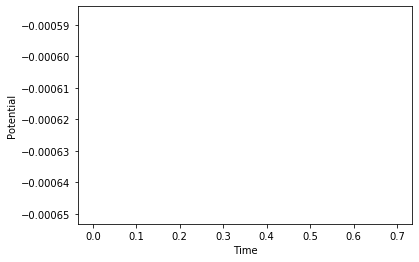

In [31]:
for j in range(len(Un[0])):
    plt.plot(time[j], Un[0][j], color='r')  
    plt.xlabel('Time')
    plt.ylabel('Potential')
plt.show()

In [32]:
test=[]
for j in range(50):
     test.append(Un[0][j])

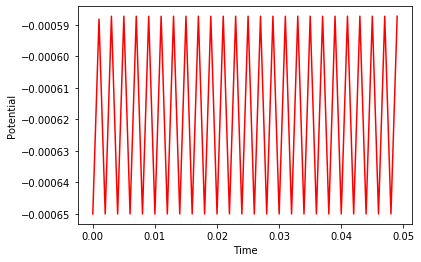

In [33]:
plt.plot (time[:50],test, color='r')  
plt.xlabel('Time')
plt.ylabel('Potential')
plt.show()